1) Importo Librerias

In [519]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import skew
from math import sqrt
from numpy import mean, var
import copy 
from sklearn import preprocessing
import json
from datetime import datetime

2) Leo el CSV

In [520]:
df=pd.read_csv("AccidentesAviones.csv")

In [521]:
df

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."


In [522]:
df.shape

(5008, 18)

In [523]:
df

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."


3)Diccionario de datos

Date - Date of accident<br>
Time - Local time, in 24 hr. in the format hh:mm<br>
Location - Location of the accident<br>
Operator - Airline or operator of the aircraft<br>
Flight -  Flight number assigned by the aircraft operator<br>
Route - Complete or partial route flown prior to the accident<br>
Type - Aircraft type<br>
Registration - ICAO registration of the aircraft<br>
cn/In - Construction or serial number / Line or fuselage number<br>
Total Aboard - Total people aboard<br>
Passengers Aboard - Passengers aboard<br>
Crew Aboard - Crew aboard<br>
Total Fatalities - Total fatalities<br>
Passengers Fatalities - Passengers fatalities<br>
Crew Fatalities - Crew fatalities<br>
Ground - Total killed on the ground<br>
Summary - Brief description of the accident and cause if known<br>

In [524]:
# Observamos un cambio en la denominación de los campos y por ello decidimos renombrar y normalizar nombres de las columnas
df.rename(columns={ 'fecha': 'date', 
                    'HORA declarada': 'time',
                    'Ruta': 'location',
                    'OperadOR': 'airline_operator',
                    'flight_no': 'flight_no',
                    'ac_type': 'aircraft_type',
                    'registration': 'aircraft_registration',
                    'cn_ln': 'construction_fuselage_number',
                    'all_aboard': 'total_aboard',
                    'PASAJEROS A BORDO': 'passengers_aboard',
                    'crew_aboard': 'crew_aboard',
                    'cantidad de fallecidos': 'total_fatalities',
                    'passenger_fatalities': 'passengers_fatalities',
                    'crew_fatalities': 'crew_fatalities',
                    'ground': 'total_killed_ground',
                    'summary': 'summary'
}, inplace=True)
df.head()

,Unnamed: 0,date,time,location,airline_operator,flight_no,route,aircraft_type,aircraft_registration,construction_fuselage_number,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,total_killed_ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [525]:
# Eliminamos las siguientes columnas por no considerarlas relevantes para nuestro análisis
df.drop(columns=['Unnamed: 0', 'aircraft_registration', 'construction_fuselage_number', 'total_killed_ground',], inplace = True)

4)Transoformaciones

In [526]:
# Empezamos con la columna 'date'
df.date.unique()

array(['September 17, 1908', 'September 07, 1909', 'July 12, 1912', ...,
       'June 10, 2021', 'July 04, 2021', 'July 06, 2021'], dtype=object)

In [527]:
# Función de conversión
def convertir_fecha(fecha):
    fecha_objeto = datetime.strptime(fecha, '%B %d, %Y')
    fecha_transformada = fecha_objeto.strftime('%Y-%m-%d')
    return fecha_transformada

# Aplicamos la conversión a la columna 'date'
df['date'] = df['date'].apply(convertir_fecha)

In [528]:
# Reemplazar los valores nulos por un valor vacío
df['date'] = df['date'].fillna('')

# Reemplazar los valores de ? por un valor vacío
df['date'] = df['date'].str.replace('?', '')

In [529]:
# Cambiamos el campo 'date' al tipo fecha
df['date'] = pd.to_datetime(df['date'])
df.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5008 entries, 0 to 5007
Series name: date
Non-Null Count  Dtype         
--------------  -----         
5008 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 39.3 KB


Tiempo

In [530]:
# Agregamos ':' entre los números en la columna 'time'
df['time'] = df['time'].str.replace(r'(\d{2})(\d{2})', r'\1:\2', regex=True)

In [531]:
# Reemplazamos los valores nulos por un valor vacío
df['time'] = df['time'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['time'] = df['time'].str.replace('?', '')

In [532]:
# Controlamos
df.time

0       17:18
1            
2       06:30
3            
4       18:30
        ...  
5003    18:35
5004    18:00
5005    08:00
5006    11:30
5007    15:00
Name: time, Length: 5008, dtype: object

In [533]:
# Obtenemos los valores únicos de la columna 'time'
valores_unicos = df['time'].unique()

# Recorremos los valores únicos
for valor in valores_unicos:
    print(valor)

17:18

06:30
18:30
10:30
01:00
15:20
23:45
05:15
08:45
07:00
07:45
21:30
10:00
16:55
12:15
17:40
11:40
13:15
16:45
13:42
17:30
c 18:00
c 02:30
c 12:00
05:30
09:30
15:27
c 13:15
08:00
08:30
04:05
14:48
c 11:00
c 9:15
11:30
c 10:00
10:45
17:00
09:18
11:45
21:00
11:01
18:00
10:10
09:35
c 17:00
18:23
c:17:00
15:00
c 15:45
02:05
09:45
c: 2:00
22:40
13:00
23:30
22:30
09:00
08:40
20:00
04:00
06:48
05:45
c 16:00
02:00
19:30
12:00
c 08:00
00:10
c:09:00
06:00
02:07
20:07
14:30
12:30
07:40
03:15
15:40
11:20
22:35
16:00
c 13:00
18:15
14:15
05:00
11:00
09:50
22:45
10:50
23:42
07:30
03:33
02:52
19:00
00:45
15:18
03:30
18:35
22:25
14:36
09:40
14:20
20:18
20:08
23:00
09:55
02:19
19:40
04:40
19:15
19:32
03:52
19:10
10:20
05:20
22:00
03:00
14:00
03:38
10:47
03:14
03:23
20:47
19:38
11:07
20:50
13:40
18:40
19:25
10:40
12:25
04:23
16:50
15:30
15:07
08:03
c 20:40
04:45
14:07
22:17
02:56
04:11
c 23:00
13:45
18:41
00:51
07:55
c 09:00
16:30
21:15
07:59
13:17
09:25
16:20
18:50
16:35
14:10
08:15
13:20
10:15
14:4

In [534]:
# Normalizamos para quedarnos solamente con la hora

def extract_digits(value):
    if pd.isnull(value):  # Comprobar si el valor es nulo
        return value
    digits = ''.join(filter(str.isdigit, value))  # Filtrar solo los dígitos del valor
    return digits[:2] if len(digits) >= 2 else digits

# Aplicamos la función
df['time'] = df['time'].apply(extract_digits)

In [535]:
# Obtenemos los valores únicos de la columna 'time'
valores_unicos = df['time'].unique()

# Recorremos los valores únicos
for valor in valores_unicos:
    print(valor)

17

06
18
10
01
15
23
05
08
07
21
16
12
11
13
02
09
04
14
91
20
22
19
00
03
90
24


In [536]:
# Volvemos a normalizar
def replace_values(value):
    if pd.isnull(value):  # Comprobar si el valor es nulo
        return value
    value = value.replace('91', '09').replace('90', '09').replace('24', '00')
    return value

# Aplicamos la función
df['time'] = df['time'].apply(replace_values)

In [537]:
# Verificamos
valores_unicos = df['time'].unique()

# Recorremos los valores únicos
for valor in valores_unicos:
    print(valor)

17

06
18
10
01
15
23
05
08
07
21
16
12
11
13
02
09
04
14
20
22
19
00
03


Paises

In [538]:
# Trabajamos sobre la columna 'location'
df.location.unique()

array(['Fort Myer, Virginia', 'Juvisy-sur-Orge, France',
       'Atlantic City, New Jersey', ..., 'Near Pyin Oo Lwin, Myanmar',
       'Patikul, Sulu, Philippines', 'Palana, Russia'], dtype=object)

In [539]:
# Reemplazamos los valores nulos por un valor vacío
df['location'] = df['location'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['location'] = df['location'].str.replace('?', '')

In [540]:
#Usaremos un grafico de barras para ver los lugares que mas se repiten

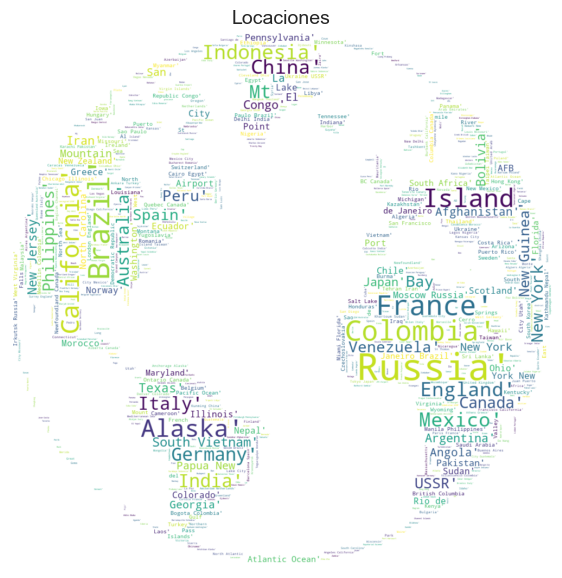

In [541]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = str(df.location.tolist())
globe_mask = np.array(Image.open('Imagenes\world-map-globe-earth-icon-vector-9733532.jpg'))

stopwords = set(STOPWORDS)
stopwords.add('nan')
stopwords.add('Near')

wc = WordCloud(background_color="white", max_words=2000, mask=globe_mask,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(7,7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Locaciones', loc='Center', fontsize=14)
plt.show()

In [542]:
# Modificaremos la columna 'location' para extraer el país en función a las coincidencias con la siguiente lista

In [543]:
lista_paises = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia",
    "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium",
    "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria",
    "Burkina Faso", "Burundi", "Côte d'Ivoire", "Cabo Verde", "Cambodia", "Cameroon", "Canada",
    "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Congo", "Costa Rica", "Croatia",
    "Cuba", "Cyprus", "Czech Republic", "Democratic Republic of the Congo", "Denmark", "Djibouti", "Dominica",
    "Dominican Republic", "Ecuador", "England", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia",
    "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece",
    "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Holy See", "Honduras", "Hungary",
    "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy","Ivory Coast", "Jamaica", "Japan", "Jordan",
    "Kazakhstan", "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia",
    "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali",
    "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia",
    "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand",
    "Nicaragua", "Nigeria", "Niger", "North Korea", "North Macedonia", "Norway", "Oman", "Pakistan", "Palau",
    "Palestine State", "Panama", "Papua", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Puerto Rico",
    "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia",
    "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Scotland",
    "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia",
    "South Africa", "South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland",
    "Syria", "Tajikistan", "Taiwan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago",
    "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom",
    "United States", "Uruguay", "USSR", "Uzbekistan", "Vanuatu", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]

In [544]:
# Definimos la función que colocará los valores en 'country'
# Si no encuentra coincidencia en 'location' colocará 'other'

def obtener_pais(location):
    for pais in lista_paises:
        if pais.lower() in location.lower():
            return pais
    return 'other'

# Aplicamos la función 'obtener_pais' a la columna 'location' y creamos la columna 'country'
df['country'] = df['location'].apply(obtener_pais)

In [545]:
# Se puede ver que muchos de los valores corresponden a estados de los Estados Unidos

# Lista de estados de los Estados Unidos
states_usa = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida",
    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
    "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio",
    "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas",
    "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

# Reemplazamos en  'country' el valor 'other' por 'United States' si 'location' contiene un estado de los Estados Unidos
df.loc[df['location'].str.contains('|'.join(states_usa), case=False, na=False), 'country'] = 'United States'

In [546]:
# Separamos vuelos considerando si la aeronave colisionó en agua o suelo

import re

# Definimos una función para asignar valores a la columna 'surface'
def assign_surface(location):
    if re.search(r'\bsea\b|\bocean\b|\briver\b|\bchannel\b|\bover\b', location, flags=re.IGNORECASE):
        return 'water'
    else:
        return 'ground'

# Creamos la columna 'surface' para identificar vuelos con accidentes en tierra o mar
df['surface'] = df['location'].apply(assign_surface)

In [547]:
df.country.unique()

array(['United States', 'France', 'Canada', 'other', 'Germany', 'Belgium',
       'England', 'Denmark', 'Italy', 'Spain', 'Australia', 'China',
       'Morocco', 'United Kingdom', 'Oman', 'Russia', 'Colombia',
       'Hungary', 'Mauritania', 'Slovakia', 'Algeria', 'Finland',
       'Uruguay', 'Brazil', 'Netherlands', 'Greece', 'Mexico', 'Cuba',
       'Iran', 'Madagascar', 'Argentina', 'New Zealand', 'Bulgaria',
       'South Africa', 'Thailand', 'Iraq', 'Chile', 'Lebanon', 'Bolivia',
       'Ukraine', 'Peru', 'Syria', 'Pakistan', 'Egypt', 'Honduras',
       'Switzerland', 'Panama', 'Poland', 'Sweden', 'Norway', 'Croatia',
       'Tajikistan', 'Libya', 'Gambia', 'Guinea', 'Sudan', 'Samoa',
       'India', 'Tanzania', 'Kenya', 'Japan', 'Mozambique', 'Ecuador',
       'Malta', 'Indonesia', 'Scotland', 'Estonia', 'Puerto Rico',
       'Turkmenistan', 'Kazakhstan', 'Austria', 'Portugal', 'Guyana',
       'Ireland', 'Nicaragua', 'Ivory Coast', 'Philippines', 'Bahamas',
       'Liberia', 'Ni

In [548]:
df.country.nunique()

164

In [549]:
df.surface.unique()

array(['ground', 'water'], dtype=object)

In [550]:
# Filtramos los registros para 'water'
df[df['surface'] == 'water']

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface
4,1913-09-09,18,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),20,?,?,14,?,?,The airship flew into a thunderstorm and encou...,other,water
15,1917-05-14,05,"Near Texel Island, North Sea",Military - German Navy,?,?,Zeppelin L-22 (airship),21,?,?,21,?,?,"Crashed into the sea from an altitude of 3,000...",other,water
16,1917-06-14,08,"Off Vlieland Island, North Sea",Military - German Navy,?,?,Zeppelin L-43 (airship),24,?,?,24,?,?,Shot down by British aircraft.,other,water
20,1918-04-07,21,Over the Mediterranean,Military - German Navy,?,?,Zeppelin L-59 (airship),23,?,?,23,?,?,Exploded and crashed into the sea off the sout...,other,water
22,1918-08-11,10,"Ameland Island, North Sea",Military - German Navy,?,?,Zeppelin L-53 (airship),19,?,?,19,?,?,Shot down by british aircraft.,other,water
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671,2008-04-28,09,"Off Crimea, Black Sea",Naftogaz,?,?,Mil Mi-8T,20,18,2,20,18,2,The helicopter crashed after the tail section ...,other,water
4729,2009-06-01,00,"Atlantic Ocean, 570 miles northeast of Natal, ...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,228,216,12,228,216,12,The Airbus went missing over the Atlantic Ocea...,Brazil,water
4886,2014-03-08,02,South Indian Ocean,Malaysia Airlines,370,Kuala Lumpur - Beijing,Boeing 777-200,239,227,12,239,227,12,Radar contact was lost with the aircraft 2 hou...,India,water
4904,2014-12-28,06,Java Sea,AirAsia,8501,Surabaya - Singapore,Airbus A-320-216,162,155,7,162,155,7,The aircraft went missing while en route from ...,other,water


In [551]:
# Ahora tenemos un número razonable para el análisis

In [552]:
# Agrupamos los datos por país y sumamos la cantidad de accidentes
total_accidentes_por_pais = df.groupby('country')['date'].count()

# Excluimos el valor 'other'
total_accidentes_por_pais = total_accidentes_por_pais.drop('other', errors='ignore')

# Obtenemos el top 10 de países por accidentes
top_10_paises = total_accidentes_por_pais.nlargest(10)
top_10_paises

country
United States    1037
Russia            255
Brazil            176
Colombia          150
Canada            133
France            129
India             112
England           101
Indonesia          99
China              98
Name: date, dtype: int64

In [553]:
# Verificamos que nuestra columna 'country' coincide con muchos de los valores observados en la nube de palabras

In [554]:
# Filtramos las filas donde el campo 'country' es igual a 'other'
df_other = df.loc[df['country'] == 'other']
df_other

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface
4,1913-09-09,18,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),20,?,?,14,?,?,The airship flew into a thunderstorm and encou...,other,water
8,1916-07-28,,"Near Jambol, Bulgeria",Military - German Army,?,?,Schutte-Lanz S-L-10 (airship),20,?,?,20,?,?,"Crashed near the Black Sea, cause unknown.",other,ground
15,1917-05-14,05,"Near Texel Island, North Sea",Military - German Navy,?,?,Zeppelin L-22 (airship),21,?,?,21,?,?,"Crashed into the sea from an altitude of 3,000...",other,water
16,1917-06-14,08,"Off Vlieland Island, North Sea",Military - German Navy,?,?,Zeppelin L-43 (airship),24,?,?,24,?,?,Shot down by British aircraft.,other,water
20,1918-04-07,21,Over the Mediterranean,Military - German Navy,?,?,Zeppelin L-59 (airship),23,?,?,23,?,?,Exploded and crashed into the sea off the sout...,other,water
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4879,2013-11-29,13,"Bwabwata National Park, Nambia",Mozambique Airline,470,"Maputo, Mozambique - Luanda, Angola",Embraer ERJ-190AR,33,27,6,33,27,6,The airliner crashed into Bwabwata National Pa...,other,ground
4904,2014-12-28,06,Java Sea,AirAsia,8501,Surabaya - Singapore,Airbus A-320-216,162,155,7,162,155,7,The aircraft went missing while en route from ...,other,water
4954,2017-07-10,16,"Near Itta Bena, Mississipi",USMC,?,"Cherry Point, NC - El Centro, CA",Lockheed KC-130T Hercules,16,14,2,16,14,2,"While en route, the Marine Corps transport suf...",other,ground
4959,2017-12-13,18,"Near Fond-du-Lac, Saskatchewan",West Wind Aviation,?,Fond-du-Lac - Stony Rapids,ATR42-320,25,22,3,1,1,0,"Shortly after taking off, the aircraft lost al...",other,ground


In [555]:
# Filtramos registros donde la superficie sea 'ground' y 'other' en país

df[(df['surface'] == 'ground') & (df['country'] == 'other')]

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface
8,1916-07-28,,"Near Jambol, Bulgeria",Military - German Army,?,?,Schutte-Lanz S-L-10 (airship),20,?,?,20,?,?,"Crashed near the Black Sea, cause unknown.",other,ground
32,1919-12-11,,"Catherham, Surrey, UK",Aircraft Travel Transport,?,Paris - Hounslow,de Havilland DH-4,1,1,1,1,1,1,Crashed in a field while attemptting to land.,other,ground
39,1920-07-20,,"Cartagena, Columbia",Compañia Colombiana de Navegación Aérea,?,?,Farman F-40,1,1,1,1,1,1,Crashed while taking off after engine failure....,other,ground
51,1921-02-03,,"Mendotta, Minnisota",US Aerial Mail Service,?,?,De Havilland DH-4,1,0,1,1,0,1,Shortly after takeoff from Minneapolis-World C...,other,ground
53,1921-02-15,,Off Gibraltar,Aeropostale,?,?,Breguet 14,2,0,2,2,0,2,The mail fligh encountered poor weather condit...,other,ground
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,2013-07-07,11,"Soldotna, Alaksa",Rediske Air,?,Soldotna - Bear Lodge,de Havilland Canada DHC-3T,10,9,1,10,9,1,As soon as the plane took off speed began to d...,other,ground
4879,2013-11-29,13,"Bwabwata National Park, Nambia",Mozambique Airline,470,"Maputo, Mozambique - Luanda, Angola",Embraer ERJ-190AR,33,27,6,33,27,6,The airliner crashed into Bwabwata National Pa...,other,ground
4954,2017-07-10,16,"Near Itta Bena, Mississipi",USMC,?,"Cherry Point, NC - El Centro, CA",Lockheed KC-130T Hercules,16,14,2,16,14,2,"While en route, the Marine Corps transport suf...",other,ground
4959,2017-12-13,18,"Near Fond-du-Lac, Saskatchewan",West Wind Aviation,?,Fond-du-Lac - Stony Rapids,ATR42-320,25,22,3,1,1,0,"Shortly after taking off, the aircraft lost al...",other,ground


In [556]:
# No representan una gran cantidad dentro del dataset y por lo general corresponen a valores mal escritos. 
# Ya tenemos nuestra columna 'country' con los países más representativos del dataset.

Operador-Airolinea/ Categoria

In [557]:
# Analizamos operadores de aerolíneas
df.airline_operator.unique()

array(['Military - U.S. Army', '?', 'Military - U.S. Navy', ...,
       'South Sudan Supreme Airlines', 'Soloy Helicopters',
       'Kamchatka Aviation Enterprise'], dtype=object)

In [558]:
# Reemplazamos los valores nulos por un valor vacío
df['airline_operator'] = df['airline_operator'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['airline_operator'] = df['airline_operator'].str.replace('?', '')

In [559]:
# Obtenemos los valores únicos de la columna 'airline_operator'
valores_unicos = df['airline_operator'].unique()

# Recorremos los valores únicos
for valor in valores_unicos:
    print(valor)

Military - U.S. Army

Military - U.S. Navy
Private
Military - German Navy
Military - German Army
US Aerial Mail Service
Wingfoot Air Express Goodyear Tire
Caproni Company
Aircraft Transport and Travel
Aircraft Travel Transport
Compañia Colombiana de Navegación Aérea
By Air
Latecoere Airlines
Handley Page Transport
Aeropostale
Military - Royal Australian Air Force
Military - Royal Airship Works
Franco-Roumaine
West Australian Airways
Military - U.S. Army Air Service
Aero Limited
Daimler Airways / Grands Express Aeriens
Cie des Messageries Aeriennes
Compagnie Franco-Roumaine de Navigaation Aerienne
Grands Express Aeriens
de Havilland Air Service
Amee de l'Air
Grands Express Aeriens (Air Union)
Air Union
Campagnie France Roumaine
Daimler Airways
CCCP
Military - French Navy
KLM Royal Dutch Airlines
SCADTA
Imperial Airways
Zakavia
Lignes Aeriennes Latecoere
CIDNA
Deutche Lufthansa
Compagnie Internationale de Navigation Aérienne
Deutsche Lufthansa
Pacific Air Transport
Fokker
Qantas
Varney A

In [560]:
df.airline_operator.nunique()

2268

In [561]:
# Creamos una nube de palabras para observar las palabras que más se repiten

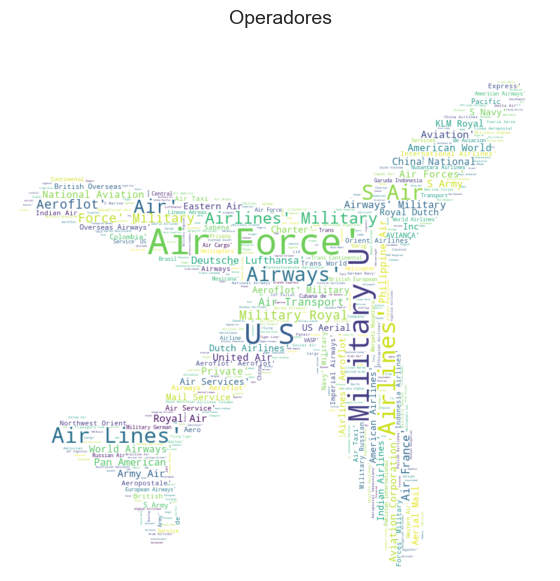

In [562]:
# Basada en operador o aeronave

from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = str(df.airline_operator.tolist())
plane_mask = np.array(Image.open('Imagenes\Plane.png'))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=2000, mask=plane_mask,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(7,7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Operadores', loc='Center', fontsize=14)
plt.show()

In [563]:
# Observamos gran presencia de vuelos militares dentro del campo (palabras como 'military', 'air force', 'Army')

In [564]:
# Verificamos si alguna de las palabras clave está presente en la columna 'airline_operator'
keywords = ['Military', 'Air Force', 'Army']
pattern = '|'.join(keywords)

# Creamos la nueva columna y separamos los vuelos por Militar y No militar
df['category'] = np.where(df['airline_operator'].str.contains('|'.join(keywords), case=False), 'military', 'non-military')

In [565]:
#Verificamos
df_grouped = df['category'].value_counts()
df_grouped

category
non-military    4217
military         791
Name: count, dtype: int64

Numero de vuelo

In [566]:
df.flight_no.unique()

array(['?', 'F-AIKG', '7', '599', '6', '4', '1', '14', '34', '23', '15A',
       'LZ 129', '2', '8', '9', '229', '19', '16', '21', '3', '203', '5',
       '71', '7208', '28', 'V-1104', '9035', '777', '63', '218', '-',
       '13', '161', '6001', '142', '45', '216', '42', '105', '16B',
       '6-103', '513', '878', '850', '942', '404', '44', '115', '140',
       '48', '6963', '2207', '665', '521', '605', '410', '121', '311',
       '608', '1629', '923', '10', '009', '572', '611', '700', '4422',
       '1-10', '624', '343', '072', '421', '331', '060', '6427', '100',
       '897R', '557', '11-8', '537', '157', '500', '307', '2501', '903',
       '32', '245', '83', '493', '129', '151', '610', '615', 'CAM5763',
       '44-2', '501', '324', '6780', '101', '4-2', '526A', '416W', '202',
       '251', '201', '376', '841', '1-6-6A', '470', '162', '636',
       '783/057', '318', '18', '512', '723', '627', '783', '304/44',
       '270', '781', '314', '152', '971', '633', '136', '57', '792',
      

In [567]:
# Reemplazamos los valores nulos por un valor vacío
df['flight_no'] = df['flight_no'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['flight_no'] = df['flight_no'].str.replace('?', '')

In [568]:
# Obtenemos los valores únicos de la columna 'flight_no'
valores_unicos = df['flight_no'].unique()

# Recorremos los valores únicos
for valor in valores_unicos:
    print(valor)


F-AIKG
7
599
6
4
1
14
34
23
15A
LZ 129
2
8
9
229
19
16
21
3
203
5
71
7208
28
V-1104
9035
777
63
218
-
13
161
6001
142
45
216
42
105
16B
6-103
513
878
850
942
404
44
115
140
48
6963
2207
665
521
605
410
121
311
608
1629
923
10
009
572
611
700
4422
1-10
624
343
072
421
331
060
6427
100
897R
557
11-8
537
157
500
307
2501
903
32
245
83
493
129
151
610
615
CAM5763
44-2
501
324
6780
101
4-2
526A
416W
202
251
201
376
841
1-6-6A
470
162
636
783/057
318
18
512
723
627
783
304/44
270
781
314
152
971
633
136
57
792
451
4844-C
329
260
626
591
711
845/26
560
402/46
476
214
24
409
629
17K
976
642
400
253
718 / 2
304
190
701
943
810-9
327
823
411
1800
111
232
844
39
103
285
11
609
543
67
222
736
205
300
607E
258
164
495
466
308
502
601
320
402
75
983
891
514
542
200
1349
1658
315
967
595
371
233
330
2511
20
871
671
710
901
503
207
538
1-11
372
613
698
36
804
830/18
738
375
0005
104
26
081
826/266
S85
651
401
424
548
210
406
897
381
859
511
529
2005
706
201/8
92
153
739/14
7816
56
007
117
902
40
771


In [569]:
df.flight_no.isna().sum()

0

Rutas

In [570]:
# Analizamos las rutas
df.route.unique()

array(['Demonstration', 'Air show', 'Test flight', ...,
       'Naypyidaw - Anisakan', 'Cagayan de Oro-Lumbia - Jolo',
       'Petropavlovsk - Palana'], dtype=object)

In [571]:
# Reemplazamos los valores nulos por un valor vacío
df['route'] = df['route'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['route'] = df['route'].str.replace('?', '')

In [572]:
# Obtenemos los valores únicos de la columna 'route'
valores_unicos = df['route'].unique()

# Recorremos los valores únicos
for valor in valores_unicos:
    print(valor)

Demonstration
Air show
Test flight

Shuttle
Venice  Taliedo
Paris - Hounslow
Washington - Newark
London - Paris
Warsaw - Prague - Strasbourg - Paris
Geraldton - Derby
Miami - Bimini
Croydon - Le Bourget
Test
Croydon - Paris
Hamburg - Berlin
Strasbourg - Paris
Venice - London
Toulouse - Barcelona - Valencia - Alicante - Malaga - Rabat
Paris - London
Paris - Berck-sur-Mer - Croydon
Croydon - Manchester
Toulon - Algiers
Lympne, England - Rotterdam, The Netherlands
Barranquilla - Bogota
Tiflis - Suchumi
Alicante - Barcelona - Toulouse
Amsterdam - Paris
Oran - Alicante
Toulouse - Barcelona
Lakehurst, NJ - S.t Louis, MO
New York - San Francisco
Paris - Cryodon
Paris - Prague - Budapest
Amsterdam - Rotterdam - Brussels - Paris
Lebourget, France - Croydon, England
New York - Paris
Casablanca -Dakar
Delivery flight
Casablanca - Oran
Charleville - Tambo - Blackall
Kassel - Frankfurt
Croydon - Schiphol
Sightseeing
Old Orchad Beach - Rome
Berlin - Munich
Saint Louis - Dakar
Tallinn - Helsinki
Daka

Marca de Aviones

In [573]:
# Analizamos las aeronaves
df.aircraft_type.unique()

array(['Wright Flyer III', 'Wright Byplane', 'Dirigible', ...,
       'Eurocopter AS350B3\xa0Ecureuil', 'Beechcraft B300 King Air 350i',
       'Antonov An 26B-100'], dtype=object)

In [574]:
# Reemplazamos los valores nulos por un valor vacío
df['aircraft_type'] = df['aircraft_type'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['aircraft_type'] = df['aircraft_type'].str.replace('?', '')

In [575]:
# Analizamos las rutas
df.aircraft_type.nunique()

2469

In [576]:
# Categorizamos las aeronaves por marca (50 marcas)

marcas_aeronaves_historicas = ['Wright Brothers', 'Boeing', 'Airbus', 'Lockheed Martin', 'McDonnell Douglas',
                              'Northrop Grumman', 'Convair', 'Grumman', 'Vickers', 'De Havilland', 'Hawker',
                              'Avro', 'Fokker', 'Junkers', 'Douglas Aircraft Company', 'Cessna', 'Piper Aircraft',
                              'Beechcraft', 'Bell Aircraft Corporation', 'Martin Marietta', 'Fairchild Aircraft',
                              'Bristol Aeroplane Company', 'Handley Page', 'Curtiss-Wright Corporation', 'Saab',
                              'Aérospatiale', 'Tupolev', 'Ilyushin', 'Antonov', 'Yakovlev', 'Sud Aviation',
                              'Dornier', 'Breguet Aviation', 'Messerschmitt', 'Vought', 'Piaggio Aerospace',
                              'Sikorsky Aircraft Corporation', 'Short Brothers', 'Supermarine', 'Avro Canada',
                              'Harbin Aircraft Manufacturing Corporation', 'English Electric',
                              'Mitsubishi Heavy Industries', 'Aichi', 'Nakajima', 'Kawasaki Heavy Industries',
                              'Handley Page', 'Armstrong Whitworth Aircraft', 'Blackburn Aircraft',
                              'Sopwith Aviation Company']

In [577]:
# Función para asignar valores a la columna 'brand'
def assign_brand(aircraft_type):
    for brand in marcas_aeronaves_historicas:
        if any(word.lower() in aircraft_type.lower().split() for word in brand.split()):
            return brand
    return 'other'

# Aplicamos la función a la columna 'aircraft_type' para crear la columna 'brand'
df['brand'] = df['aircraft_type'].apply(assign_brand)

In [578]:
df.tail(2)

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand
5006,2021-07-04,11,"Patikul, Sulu, Philippines",Military - Philippine Air Force,,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,96,88,8,50,?,?,"While attempting to land at Jolo Airport, the ...",Philippines,ground,military,Lockheed Martin
5007,2021-07-06,15,"Palana, Russia",Kamchatka Aviation Enterprise,251,Petropavlovsk - Palana,Antonov An 26B-100,28,22,6,28,22,6,The passenger plane crashed into the top of a ...,Russia,ground,non-military,Antonov


Total Personas

In [579]:
df.total_aboard.isna().sum()

0

In [580]:
df.total_aboard.unique()

array(['2', '1', '5', '20', '28', '41', '19', '22', '23', '21', '24',
       '16', '18', '?', '14', '0', '8', '3', '49', '45', '6', '7', '17',
       '4', '11', '52', '43', '15', '12', '9', '13', '54', '10', '76',
       '83', '50', '25', '97', '29', '36', '34', '37', '35', '26', '39',
       '31', '27', '30', '59', '44', '38', '32', '42', '53', '48', '40',
       '69', '33', '81', '58', '55', '46', '65', '51', '56', '63', '47',
       '70', '57', '115', '129', '66', '67', '74', '64', '128', '80',
       '62', '101', '159', '68', '79', '61', '73', '99', '60', '94', '72',
       '106', '78', '85', '122', '77', '88', '119', '95', '111', '107',
       '132', '112', '84', '105', '86', '118', '87', '103', '127', '153',
       '91', '117', '133', '124', '98', '82', '90', '130', '102', '155',
       '89', '120', '109', '100', '75', '229', '93', '126', '164', '218',
       '121', '92', '104', '156', '108', '174', '176', '202', '113',
       '182', '145', '134', '149', '177', '298', '346', '96'

In [581]:
df.total_aboard.nunique()

245

In [582]:
# Reemplazamos los valores nulos por un valor vacío
df['total_aboard'] = df['total_aboard'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['total_aboard'] = df['total_aboard'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
df['total_aboard'] = pd.to_numeric(df['total_aboard'], errors='coerce')


In [583]:
df.total_aboard.unique()

array([  2.,   1.,   5.,  20.,  28.,  41.,  19.,  22.,  23.,  21.,  24.,
        16.,  18.,  nan,  14.,   0.,   8.,   3.,  49.,  45.,   6.,   7.,
        17.,   4.,  11.,  52.,  43.,  15.,  12.,   9.,  13.,  54.,  10.,
        76.,  83.,  50.,  25.,  97.,  29.,  36.,  34.,  37.,  35.,  26.,
        39.,  31.,  27.,  30.,  59.,  44.,  38.,  32.,  42.,  53.,  48.,
        40.,  69.,  33.,  81.,  58.,  55.,  46.,  65.,  51.,  56.,  63.,
        47.,  70.,  57., 115., 129.,  66.,  67.,  74.,  64., 128.,  80.,
        62., 101., 159.,  68.,  79.,  61.,  73.,  99.,  60.,  94.,  72.,
       106.,  78.,  85., 122.,  77.,  88., 119.,  95., 111., 107., 132.,
       112.,  84., 105.,  86., 118.,  87., 103., 127., 153.,  91., 117.,
       133., 124.,  98.,  82.,  90., 130., 102., 155.,  89., 120., 109.,
       100.,  75., 229.,  93., 126., 164., 218., 121.,  92., 104., 156.,
       108., 174., 176., 202., 113., 182., 145., 134., 149., 177., 298.,
       346.,  96., 157., 191., 330., 188., 131., 25

In [584]:
df.total_aboard.nunique()

244

In [585]:
# Filtramos el DataFrame para registros con 'total_aboard' vacío
filtered_df = df[df['total_aboard'].isna()]
filtered_df

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand
26,1919-07-21,16,"Chicago, Illinois",Wingfoot Air Express Goodyear Tire,,Shuttle,FD Type Dirigible,NaN,?,?,3,2,1,"The dirigible, cruising at 1,200 ft. caught fi...",United States,ground,non-military,other
103,1925-09-07,,"Toul, France",CIDNA,,,Spad 33,NaN,?,?,?,?,?,?,France,ground,non-military,other
347,1934-08-10,,"Ningbo, China",China National Aviation Corporation,,,Sikorsky S-38B,NaN,?,?,?,?,?,?,China,ground,non-military,Sikorsky Aircraft Corporation
384,1935-08-13,,"Hangow, China",China National Aviation Corporation,,,Sikorsky S-38B,NaN,?,?,?,?,?,Destoryed in a storm.,China,ground,non-military,Sikorsky Aircraft Corporation
451,1936-12-26,,"Nanking, China",China National Aviation Corporation,,,Douglas DC-2,NaN,?,?,?,?,?,?,China,ground,non-military,McDonnell Douglas
652,1942-10-01,,"Kunming, China",China National Aviation Corporation,,,Douglas C-47,NaN,?,?,?,?,?,Crashed while attempting to land after losing ...,China,ground,non-military,McDonnell Douglas
754,1944-11-09,,"Seljord, Norway",Military - U.S. Army Air Corps,,,,NaN,?,?,?,?,?,?,Norway,ground,military,other
854,1946-03-18,,"Between Chungking and Shanghai, China",China National Aviation Corporation,,Chunking - Shanghai,,NaN,?,?,?,?,?,Disappeared while en route. Plane never located.,China,ground,non-military,other
1231,1951-01-20,,"Huilyo, Peru",Military - TAM,,,Douglas DC-3,NaN,?,?,16,?,?,?,Peru,ground,military,McDonnell Douglas
1362,1952-12-22,,"Damascus, Syria",Syrian Air,,,Douglas DC-3,NaN,?,?,9,?,?,?,Syria,ground,non-military,McDonnell Douglas


In [586]:
# Filtramos el DataFrame para registros con 'total_aboard' igual a 0
filtered_df = df.loc[df['total_aboard'] == 0]
filtered_df

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand
30,1919-10-20,,"English Channel off Forkstone, Kent",Aircraft Transport and Travel,,,De Havilland DH-4,0.0,0,1,0,0,0,Crashed into the sea while attempting to land ...,other,water,non-military,De Havilland
120,1927-01-12,,"Estaires, France",Fokker,,Delivery flight,Fokker F-VII,0.0,0,2,0,0,2,The flight crew encountered poor weather condi...,France,ground,non-military,Fokker
1121,1949-07-13,,"Jamnagar, Gujarat state, India",Indian Air Force,,Training,Hawker Hunter,0.0,1,1,0,1,1,Crashed into a garage near Jamnagar railway st...,India,ground,military,Hawker
3144,1981-09-22,12,"Near Babaeski, Turkey",Military - Turkish Air Force,,,Northrop F-5A,0.0,0,0,0,0,0,The fighter crashed into a village after the p...,Turkey,ground,military,Northrop Grumman
3376,1986-03-27,,"Bangui, Central African Republic",Military - French Air Force,,,Sepecat Jaguar A,0.0,0,0,0,0,0,The jet fighter crashed into a school shortly ...,Central African Republic,ground,military,other


In [587]:
# Tomamos el criterio de eliminar registros con 'total_aboard' vacío al ser pocos los registros
df = df.dropna(subset=['total_aboard'])

In [588]:
df.total_aboard.isna().sum()

0

In [589]:
# Y también eliminamos los registros donde 'total_aboard' es igual a 0 al ser pocos los registros también
df = df.drop(df[df['total_aboard'] == 0].index)

In [590]:
df.total_aboard.nunique()

243

In [591]:
df.total_aboard.unique()

array([  2.,   1.,   5.,  20.,  28.,  41.,  19.,  22.,  23.,  21.,  24.,
        16.,  18.,  14.,   8.,   3.,  49.,  45.,   6.,   7.,  17.,   4.,
        11.,  52.,  43.,  15.,  12.,   9.,  13.,  54.,  10.,  76.,  83.,
        50.,  25.,  97.,  29.,  36.,  34.,  37.,  35.,  26.,  39.,  31.,
        27.,  30.,  59.,  44.,  38.,  32.,  42.,  53.,  48.,  40.,  69.,
        33.,  81.,  58.,  55.,  46.,  65.,  51.,  56.,  63.,  47.,  70.,
        57., 115., 129.,  66.,  67.,  74.,  64., 128.,  80.,  62., 101.,
       159.,  68.,  79.,  61.,  73.,  99.,  60.,  94.,  72., 106.,  78.,
        85., 122.,  77.,  88., 119.,  95., 111., 107., 132., 112.,  84.,
       105.,  86., 118.,  87., 103., 127., 153.,  91., 117., 133., 124.,
        98.,  82.,  90., 130., 102., 155.,  89., 120., 109., 100.,  75.,
       229.,  93., 126., 164., 218., 121.,  92., 104., 156., 108., 174.,
       176., 202., 113., 182., 145., 134., 149., 177., 298., 346.,  96.,
       157., 191., 330., 188., 131., 258., 154., 64

Pasajeros

In [592]:
# Reemplazamos los valores nulos por un valor vacío
df['passengers_aboard'] = df['passengers_aboard'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['passengers_aboard'] = df['passengers_aboard'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
df['passengers_aboard'] = pd.to_numeric(df['passengers_aboard'], errors='coerce')

In [593]:
df.passengers_aboard.isna().sum()

204

Tripulacion

In [594]:
# Reemplazamos los valores nulos por un valor vacío
df['crew_aboard'] = df['crew_aboard'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['crew_aboard'] = df['crew_aboard'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
df['crew_aboard'] = pd.to_numeric(df['crew_aboard'], errors='coerce')

In [595]:
df.passengers_aboard.isna().sum()

204

In [596]:
# Al ser la misma cantidad filtramos el DataFrame para las filas donde 'passengers_abroad' y 'crew_aboard' son nulos
filtered_df = df[df['passengers_aboard'].isnull() & df['crew_aboard'].isnull()]
filtered_df

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand
4,1913-09-09,18,Over the North Sea,Military - German Navy,,,Zeppelin L-1 (airship),20.0,NaN,NaN,14,?,?,The airship flew into a thunderstorm and encou...,other,water,military,other
5,1913-10-17,10,"Near Johannisthal, Germany",Military - German Navy,,,Zeppelin L-2 (airship),28.0,NaN,NaN,28,?,?,Hydrogen gas which was being vented was sucked...,Germany,ground,military,other
7,1915-09-03,15,"Off Cuxhaven, Germany",Military - German Navy,,,Zeppelin L-10 (airship),19.0,NaN,NaN,19,?,?,"Exploded and burned near Neuwerk Island, when...",Germany,ground,military,other
8,1916-07-28,,"Near Jambol, Bulgeria",Military - German Army,,,Schutte-Lanz S-L-10 (airship),20.0,NaN,NaN,20,?,?,"Crashed near the Black Sea, cause unknown.",other,ground,military,other
9,1916-09-24,01,"Billericay, England",Military - German Navy,,,Zeppelin L-32 (airship),22.0,NaN,NaN,22,?,?,Shot down by British aircraft crashing in flames.,England,ground,military,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4786,2010-10-06,,"Rasht Valley, Tajikistan",Military - Tajik National Guard,,,Mi-8,28.0,NaN,NaN,28,?,?,The military helicopter crashed after hitting ...,Tajikistan,ground,military,other
4791,2010-11-25,12,"Strezhevoy, Russia",NARZ,,,Mil Mi-8T,10.0,NaN,NaN,7,?,?,"The helicopter, which was delivering workers t...",Russia,ground,non-military,other
4802,2011-04-19,13,"Tawang, India",Pawan Hans Helicopters Ltd.,,,Mil Mi-172,23.0,NaN,NaN,18,?,?,The helicopter crashed into a hill as it attem...,India,ground,non-military,other
4813,2011-08-06,,"Tangi Valley, Afghanistan",Military - U.S. Army,,,Boeing CH-47 Chinook,38.0,NaN,NaN,38,?,?,"Thirty-eight people, including 31 U.S. special...",Afghanistan,ground,military,Boeing


In [597]:
# No haremos modificaciones pero debemos considerar que probablemente no podamos analizar para dichos registros esas características porque tenemos datos faltantes

Total fatalidades

In [598]:
# Reemplazamos los valores nulos por un valor vacío
df['total_fatalities'] = df['total_fatalities'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['total_fatalities'] = df['total_fatalities'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
df['total_fatalities'] = pd.to_numeric(df['total_fatalities'], errors='coerce')

In [599]:
df.total_fatalities.isna().sum()

0

Muertes Pasajeros

In [600]:
# Reemplazamos los valores nulos por un valor vacío
df['passengers_fatalities'] = df['passengers_fatalities'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['passengers_fatalities'] = df['passengers_fatalities'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
df['passengers_fatalities'] = pd.to_numeric(df['passengers_fatalities'], errors='coerce')

In [601]:
df.passengers_fatalities.isna().sum()

221

Muertes Tripulacion

In [602]:
# Reemplazamos los valores nulos por un valor vacío
df['crew_fatalities'] = df['crew_fatalities'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df['crew_fatalities'] = df['crew_fatalities'].str.replace('?', '')

# Convertimos la columna 'total_abord' a tipo numérico 
df['crew_fatalities'] = pd.to_numeric(df['crew_fatalities'], errors='coerce')

In [603]:
df.crew_fatalities.isna().sum()

220

In [604]:
# Al ser la misma cantidad filtramos el DataFrame para las filas donde 'passengers_fatalities' y 'crew_fatalities' son nulos
filtered_df = df[df['passengers_fatalities'].isnull() & df['crew_fatalities'].isnull()]
filtered_df

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand
4,1913-09-09,18,Over the North Sea,Military - German Navy,,,Zeppelin L-1 (airship),20.0,NaN,NaN,14,NaN,NaN,The airship flew into a thunderstorm and encou...,other,water,military,other
5,1913-10-17,10,"Near Johannisthal, Germany",Military - German Navy,,,Zeppelin L-2 (airship),28.0,NaN,NaN,28,NaN,NaN,Hydrogen gas which was being vented was sucked...,Germany,ground,military,other
7,1915-09-03,15,"Off Cuxhaven, Germany",Military - German Navy,,,Zeppelin L-10 (airship),19.0,NaN,NaN,19,NaN,NaN,"Exploded and burned near Neuwerk Island, when...",Germany,ground,military,other
8,1916-07-28,,"Near Jambol, Bulgeria",Military - German Army,,,Schutte-Lanz S-L-10 (airship),20.0,NaN,NaN,20,NaN,NaN,"Crashed near the Black Sea, cause unknown.",other,ground,military,other
9,1916-09-24,01,"Billericay, England",Military - German Navy,,,Zeppelin L-32 (airship),22.0,NaN,NaN,22,NaN,NaN,Shot down by British aircraft crashing in flames.,England,ground,military,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813,2011-08-06,,"Tangi Valley, Afghanistan",Military - U.S. Army,,,Boeing CH-47 Chinook,38.0,NaN,NaN,38,NaN,NaN,"Thirty-eight people, including 31 U.S. special...",Afghanistan,ground,military,Boeing
4833,2012-03-16,10,"Kabul, Afghanistan",Military - Turkish Army (NATO),,,Sikorsky S-70A-28,12.0,NaN,NaN,12,NaN,NaN,The helicopter crashed on the outskirts of Kab...,Afghanistan,ground,military,Sikorsky Aircraft Corporation
4848,2012-10-07,12,"Near Omdurman, Sudan",Military - Sudanese Air Force,,,Antonov An-12BP,22.0,16.0,6.0,15,NaN,NaN,"The transport, carrying military personnel and...",Sudan,ground,military,Antonov
4894,2014-07-07,07,"Thach That district, Vietnam",Military - Vietnam People's Army Air Force,,Training,Mil Mi-171,19.0,21.0,2.0,18,NaN,NaN,The helicopter crashed about 40 km west of Ha...,Vietnam,ground,military,other


In [605]:
# No se podra hacer modificaciones ya que  exististen registros faltantes para ambas columnas

Sobrevivientes

In [606]:
# Calculamos la cantidad de sobrevivientes para cada vuelo

df['survivors'] = df['total_aboard'] - df['total_fatalities']

In [607]:
# Miramos la información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4986 entries, 0 to 5007
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   4986 non-null   datetime64[ns]
 1   time                   4986 non-null   object        
 2   location               4986 non-null   object        
 3   airline_operator       4986 non-null   object        
 4   flight_no              4986 non-null   object        
 5   route                  4986 non-null   object        
 6   aircraft_type          4986 non-null   object        
 7   total_aboard           4986 non-null   float64       
 8   passengers_aboard      4782 non-null   float64       
 9   crew_aboard            4784 non-null   float64       
 10  total_fatalities       4986 non-null   int64         
 11  passengers_fatalities  4765 non-null   float64       
 12  crew_fatalities        4766 non-null   float64       
 13  summary 

6) Trato de valores Duplicados

In [608]:
# Buscamos filas con valores duplicados
duplicados = df[df.duplicated()] 
duplicados

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand,survivors


In [609]:
# Al no existir estos no podemos hacer nada

5) Trato de valores Nulos

In [610]:
df.isna().sum()

date                       0
time                       0
location                   0
airline_operator           0
flight_no                  0
route                      0
aircraft_type              0
total_aboard               0
passengers_aboard        204
crew_aboard              202
total_fatalities           0
passengers_fatalities    221
crew_fatalities          220
summary                    0
country                    0
surface                    0
category                   0
brand                      0
survivors                  0
dtype: int64

In [611]:
print(f"El porcentaje de valores nulos en pasajeros a bordo es  {round(df['passengers_aboard'].isna().sum()*100/df.shape[0], 2)}%.")
print(f"El porcentaje de valores nulos en tripulación a bordo es  {round(df['crew_aboard'].isna().sum()*100/df.shape[0], 2)}%.")
print(f"El porcentaje de valores nulos en fatalidades en pasajeros es  {round(df['passengers_fatalities'].isna().sum()*100/df.shape[0], 2)}%.")
print(f"El porcentaje de valores nulos en fatalidades en tripulación a bordo es  {round(df['crew_fatalities'].isna().sum()*100/df.shape[0], 2)}%.")

El porcentaje de valores nulos en pasajeros a bordo es  4.09%.
El porcentaje de valores nulos en tripulación a bordo es  4.05%.
El porcentaje de valores nulos en fatalidades en pasajeros es  4.43%.
El porcentaje de valores nulos en fatalidades en tripulación a bordo es  4.41%.


7) Nubes de palabras

Con esta nube en forma de avion podremos ver en las descripciones las palabras mas frecuentes

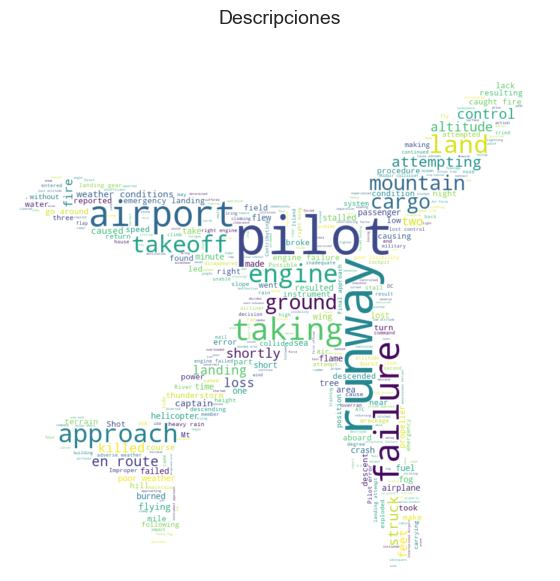

In [612]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = str(df.summary.tolist())
plane_mask = np.array(Image.open('Imagenes\Plane.png'))

stopwords = set(STOPWORDS)
stopwords.add('aircraft')
stopwords.add('plane')
stopwords.add('due')
stopwords.add('hit')
stopwords.add('left')
stopwords.add('ft')
stopwords.add('crashed')
stopwords.add('flight')
stopwords.add('accident')
stopwords.add('crew')

wc = WordCloud(background_color="white", max_words=2000, mask=plane_mask,
               stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(7,7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Descripciones', loc='Center', fontsize=14)
plt.savefig('./aircraft_wordcloud.png', dpi=50)
plt.show()

In [613]:
# Estas palabras las usaremos luego para hacer otros analisis

4) Análisis descriptivo

In [614]:
df.describe()

,date,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,survivors
count,4986,4986.000000,4782.000000,4784.000000,4986.000000,4765.000000,4766.000000,4986.000000
mean,1971-06-16 18:21:30.974729296,31.152427,26.905270,4.523411,22.341957,18.971459,3.591691,8.810469
min,1908-09-17 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1951-06-29 06:00:00,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,1970-10-05 00:00:00,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,1992-04-15 12:00:00,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,3.750000
max,2021-07-06 00:00:00,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,516.000000
std,NaN,45.492081,44.049904,3.758032,35.035543,34.085492,3.177420,30.653307


Grafico de Lineas

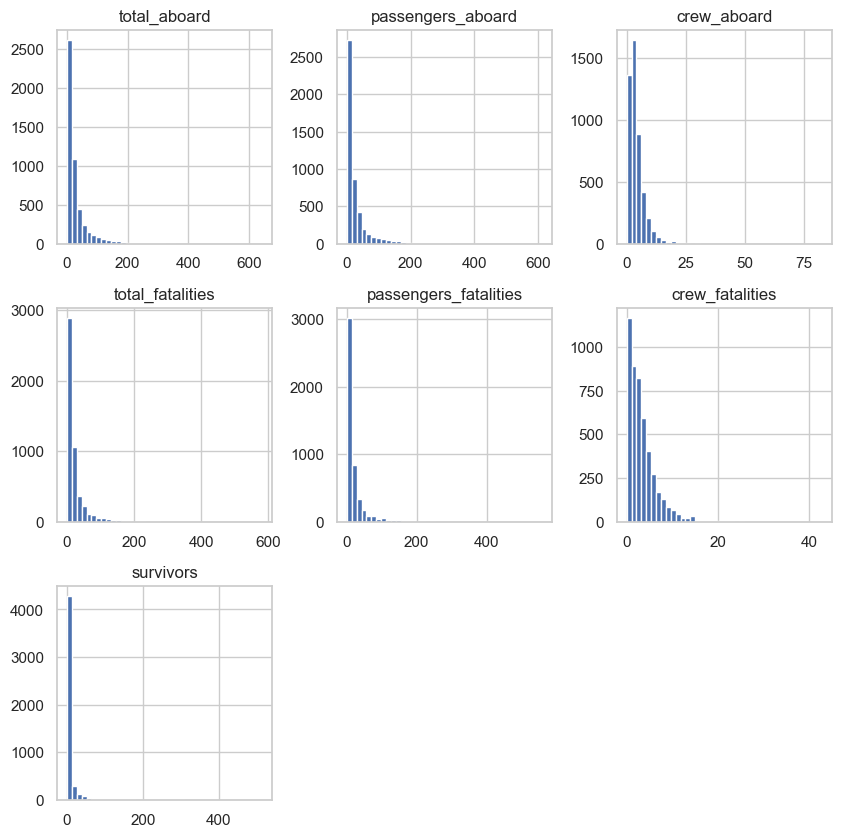

In [615]:
columns = ['total_aboard', 'passengers_aboard', 'crew_aboard', 'total_fatalities', 'passengers_fatalities', 'crew_fatalities', 'survivors']
df[columns].hist(bins=40, figsize= (10, 10))
plt.show()

Outliers

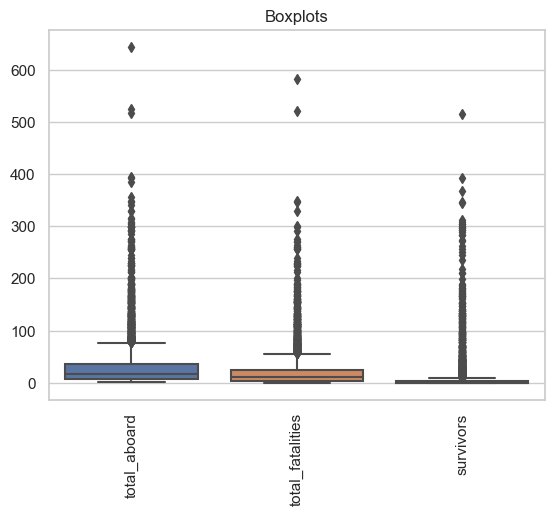

In [616]:
# Graficamos las siguientes variables que podemos utilizar (ya que no tienen valores nulos)

sns.boxplot(data=df[['total_aboard', 'total_fatalities', 'survivors']])
plt.title('Boxplots')
plt.xticks(rotation=90)
plt.show()

In [617]:
# Se pueden observar que en total_aboard y total_fatalities que son las columnas que nos interesan

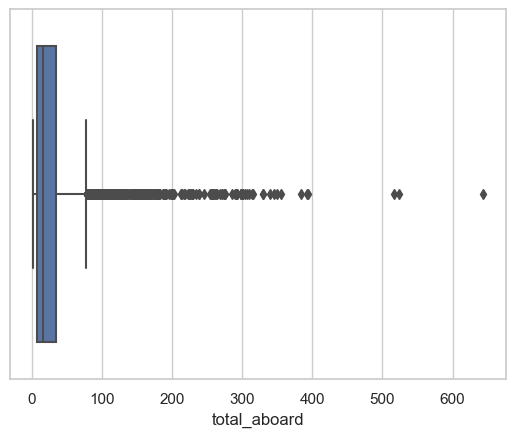

El rango intercuartil (IQR) de total_aboard es 28.0
-35.0 77.0


,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand,survivors
364,1935-02-12,,"Off Point Sur, Californiia",Military - US Navy,,,Goodyear-Zeppelin U.S.S. Macon (airship),83.0,0.0,83.0,2,0.0,2.0,The airship suffered structural failure in a s...,other,ground,military,other,81.0
462,1937-05-06,19,"Lakehurst, New Jersey",Deutsche Zeppelin Reederei,LZ 129,Frankfurt - Lakehurst N.J.,Zeppelin LZ-129,97.0,36.0,61.0,35,13.0,22.0,The airship Hindenburg caught fire and burned ...,United States,ground,non-military,other,62.0
1116,1949-06-07,00,"San Juan, Puerto Rico",Strato Freight,,San Juan - Miami,Curtiss C-46D-5-CU,81.0,75.0,6.0,53,52.0,1.0,The aircraft crashed into the Atlantic Ocean d...,Puerto Rico,ground,non-military,other,28.0
1165,1950-03-12,14,"Llandow Airport, Cardiff, Wales",Fairflight Ltd.,,Llandow - Dublin,Avro 689 Tudor 5,83.0,78.0,5.0,80,75.0,5.0,During the approach to Runway 28 at Llandow Ai...,other,ground,non-military,Avro,3.0
1360,1952-12-20,06,"Moses Lake, Washington",Military - U.S. Air Force,,,Douglas C-124A Globemaster,115.0,105.0,10.0,87,82.0,5.0,Within two minutes after takeoff the aircraft ...,United States,ground,military,McDonnell Douglas,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,2020-01-08,06,"Near Shahriah, Iran",Ukraine International Airlines,PS752,Tehran - Kiev,Boeing 737-8KV WL,176.0,167.0,9.0,176,167.0,9.0,The plane took off from Tehran International A...,Iran,ground,non-military,Boeing,0.0
4995,2020-02-05,18,"Istanbul, Turkey",Pegasus Airlines,PC2193,Izmir - Istanbul,Boeing 737-86J,177.0,171.0,6.0,3,3.0,0.0,While landing duriing high winds and heavey ra...,Turkey,ground,non-military,Boeing,174.0
4997,2020-05-22,14,"Karachi, Pakistan",Pakistan International Airline,PK8303,Lahore - Karachi,Airbus A320-214,99.0,91.0,8.0,97,89.0,8.0,"While landing, the aircraft scraped the runway...",Pakistan,ground,non-military,Airbus,2.0
4998,2020-08-07,19,"Calicut, India",Air India Exppress,IX344,Dubai - Calicut,Boeing 737-8HG,190.0,184.0,6.0,20,18.0,2.0,The flight IX344 suffered a runway excursion w...,India,ground,non-military,Boeing,170.0


In [618]:
# Filtramos outliers de total_aboard

sns.boxplot(data = df, x = 'total_aboard')
plt.show()

# IQR
Q1 = np.percentile(df['total_aboard'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['total_aboard'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(f"El rango intercuartil (IQR) de total_aboard es {IQR}")

lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
print(lower_lim, upper_lim)

df[(df['total_aboard']<lower_lim) | (df['total_aboard']>upper_lim)]

In [619]:
# Al ser muchos registros pienso que es mejor filtrar vuelos de más de 500 personas

df[(df['total_aboard']>500)]

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand,survivors
2902,1977-03-27,17,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,644.0,614.0,30.0,583,560.0,23.0,Both aircraft were diverted to Tenerife becaus...,other,ground,non-military,Boeing,61.0
3341,1985-08-12,18,"Mt. Osutaka, near Ueno Village, Japan",Japan Air Lines,123,Tokyo - Osaka,Boeing B-747-SR46,524.0,509.0,15.0,520,505.0,15.0,The aircraft suffered an aft pressure bulkhead...,Japan,ground,non-military,Boeing,4.0
4219,1999-07-23,11,"Tokyo, Japan",All Nippon Airways,61,"Tokyo, Japan - Chitose, Japan",Boeing B-747,517.0,503.0,14.0,1,0.0,1.0,Two minutes after taking off from Haneda Airpo...,Japan,ground,non-military,Boeing,516.0


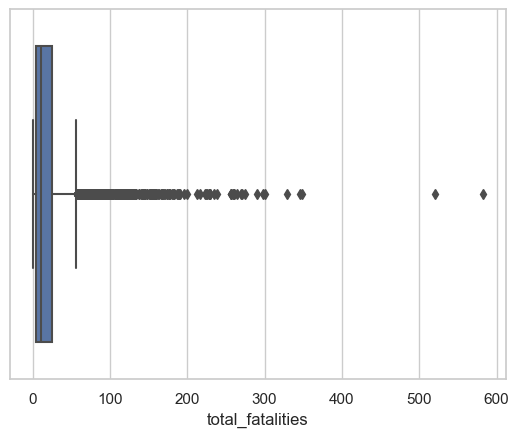

El rango intercuartil (IQR) de total_fatalities es 21.0
-27.5 56.5


,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand,survivors
311,1933-04-04,12,"Off Barnegat, New Jersey",Military - U.S. Navy,,,Goodyear-Zeppelin U.S.S. Akron (airship),76.0,NaN,NaN,73,NaN,NaN,"While cruising at 1,600 feet off New Jersey, s...",United States,ground,military,other,3.0
814,1945-10-16,11,"Near Peking, China",Military - U.S. Army Air Forces,,Hankou - Peking,Curtiss-Wright C-46F-CU,59.0,55.0,4.0,59,55.0,4.0,Struck a radio transmission tower while on app...,China,ground,military,Curtiss-Wright Corporation,0.0
1165,1950-03-12,14,"Llandow Airport, Cardiff, Wales",Fairflight Ltd.,,Llandow - Dublin,Avro 689 Tudor 5,83.0,78.0,5.0,80,75.0,5.0,During the approach to Runway 28 at Llandow Ai...,other,ground,non-military,Avro,3.0
1183,1950-06-23,23,"Lake Michigan, 18 NNW of Benton Harbor, Michigan",Northwest Orient Airlines,2501,New York City - Minneapolis - Spokan -Seattle,Douglas DC-4,58.0,55.0,3.0,58,55.0,3.0,"En route from New York to Minneapolis, the air...",United States,ground,non-military,McDonnell Douglas,0.0
1211,1950-11-13,18,"Mt. Tete de L'Obiou, France",Curtiss-Reid Flying Services Ltd. (Canada),,Rome - Paris,Douglas C-54B-1-DC,58.0,51.0,7.0,58,51.0,7.0,The aircraft drifted 50 miles off the prescrib...,France,ground,non-military,McDonnell Douglas,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,2018-10-29,06,"Off Jakarta, Indonesia",Lion Air,610,Jakarta - Pangkal Pinang,Boeing 737-MAX 8,189.0,181.0,8.0,189,181.0,8.0,"The airliner crashed into the Jakarta Sea, 13 ...",Indonesia,ground,non-military,Boeing,0.0
4983,2019-03-10,08,"Bishoftu, Ethiopia",Ethiopian Airlines,302,Addis Ababa - Nairobi,Boeing 737 Max 8,157.0,149.0,8.0,157,149.0,8.0,The internationally scheduled airliner crashed...,Ethiopia,ground,non-military,Boeing,0.0
4994,2020-01-08,06,"Near Shahriah, Iran",Ukraine International Airlines,PS752,Tehran - Kiev,Boeing 737-8KV WL,176.0,167.0,9.0,176,167.0,9.0,The plane took off from Tehran International A...,Iran,ground,non-military,Boeing,0.0
4997,2020-05-22,14,"Karachi, Pakistan",Pakistan International Airline,PK8303,Lahore - Karachi,Airbus A320-214,99.0,91.0,8.0,97,89.0,8.0,"While landing, the aircraft scraped the runway...",Pakistan,ground,non-military,Airbus,2.0


In [620]:
# Filtramos outliers de total_fatalities

sns.boxplot(data = df, x = 'total_fatalities')
plt.show()

# IQR
Q1 = np.percentile(df['total_fatalities'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['total_fatalities'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(f"El rango intercuartil (IQR) de total_fatalities es {IQR}")

lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
print(lower_lim, upper_lim)

df[(df['total_fatalities']<lower_lim) | (df['total_fatalities']>upper_lim)]

In [621]:
# Son muchos registros por lo que evaluamos la conveniencia de filtrar registros en donde tengamos un mayor número de fatalidades que de personas a bordo

df[df['total_fatalities'] > df['total_aboard']]

,date,time,location,airline_operator,flight_no,route,aircraft_type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,summary,country,surface,category,brand,survivors


In [622]:
# Al no tener los registros es seguro que no tenemos datos iguales entonces no realizamos ninguna accion

In [623]:
print('El total de accidentes es de', df.shape[0])

El total de accidentes es de 4986


Graficos de barras

Pais con mas accidentes

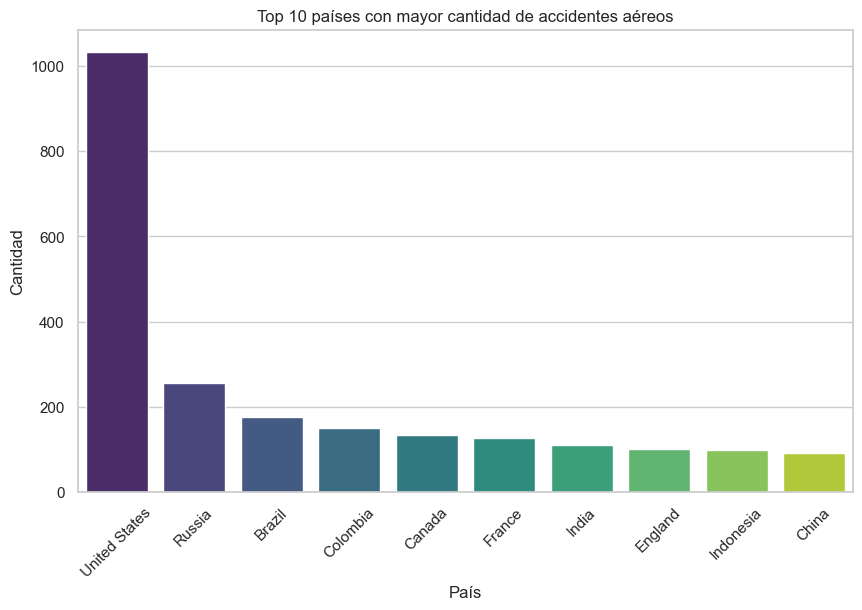

In [624]:
# Filtramos los datos para excluir la categoría 'other'
filtered_data = df[df['country'] != 'other']

# Calculamos el recuento de accidentes por país (tomamos los 10 más representativos)
country_counts = filtered_data['country'].value_counts().head(10)

# Creamos un DataFrame con los datos de recuento
top_countries = pd.DataFrame({'Country': country_counts.index, 'Accident Count': country_counts.values})

# Creamos el gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Accident Count', data=top_countries, palette='viridis')
plt.title('Top 10 países con mayor cantidad de accidentes aéreos')
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

Calcular la operadora con mayor tendencia en accidentes

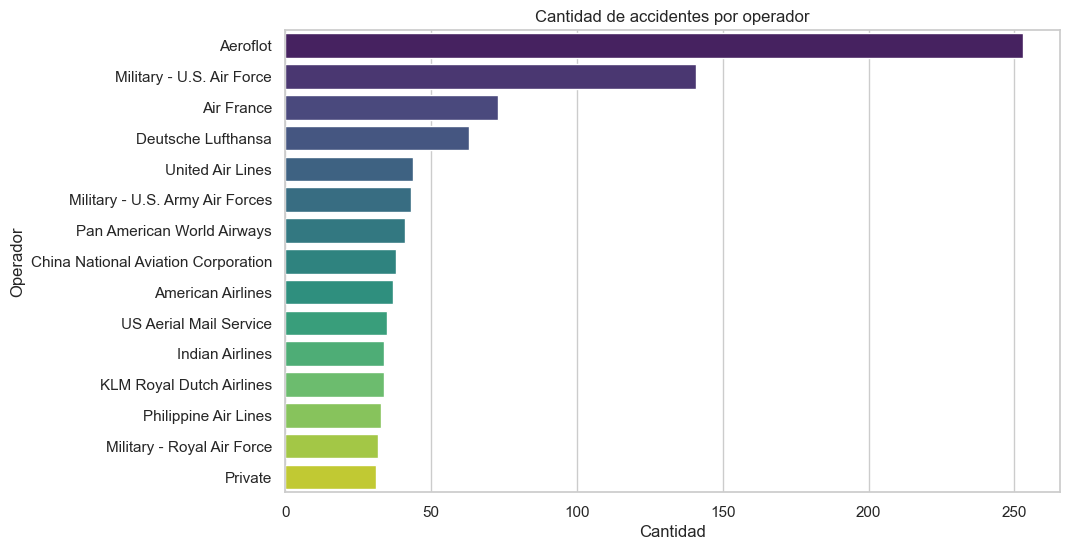

In [625]:
# Calculamos el recuento de accidentes por operador de aerolíneas (tomamos las 15 más representativos)
operator_counts = df['airline_operator'].value_counts().head(15)

# Creamos un DataFrame con los datos de recuento
top_operators = pd.DataFrame({'Operator': operator_counts.index, 'Accident Count': operator_counts.values})

# Creamos el gráfico de columnas horizontales utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Accident Count', y='Operator', data=top_operators, palette='viridis')
plt.title('Cantidad de accidentes por operador')
plt.xlabel('Cantidad')
plt.ylabel('Operador')
plt.show()

Cual es el avion con mas cantidad de accidentes?

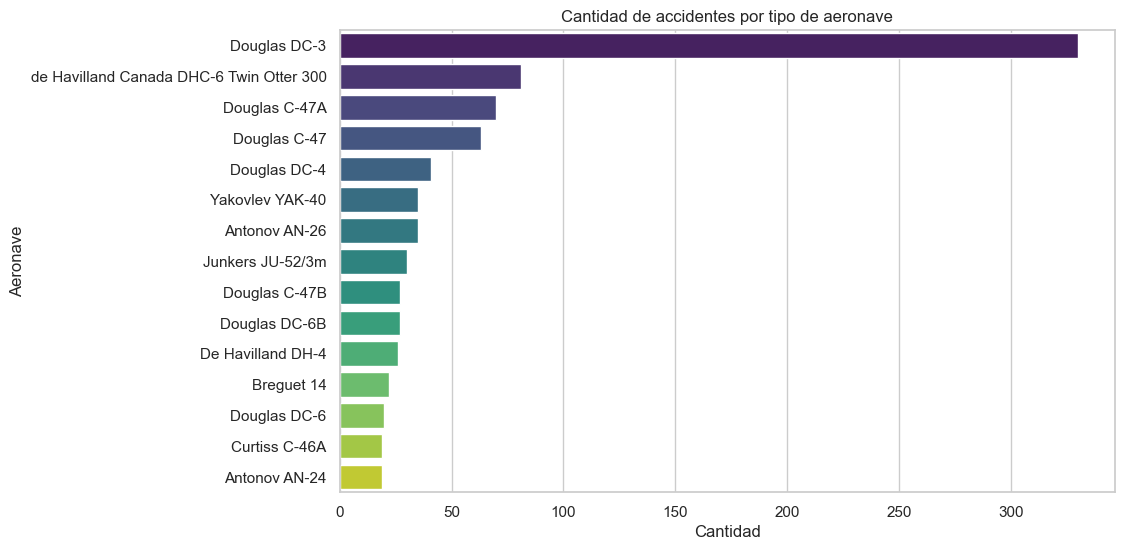

In [626]:
# Calculamos el recuento de accidentes por tipo de aeronave (tomamos las 15 más representativas)
operator_counts = df['aircraft_type'].value_counts().head(15)

# Creamos un DataFrame con los datos de recuento 
top_aircrafts = pd.DataFrame({'Aircraft': operator_counts.index, 'Accident Count': operator_counts.values})

# Creamos el gráfico de columnas horizontales utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Accident Count', y='Aircraft', data=top_aircrafts, palette='viridis')
plt.title('Cantidad de accidentes por tipo de aeronave')
plt.xlabel('Cantidad')
plt.ylabel('Aeronave')
plt.show()

Cual es la categoria con mas accidentes?

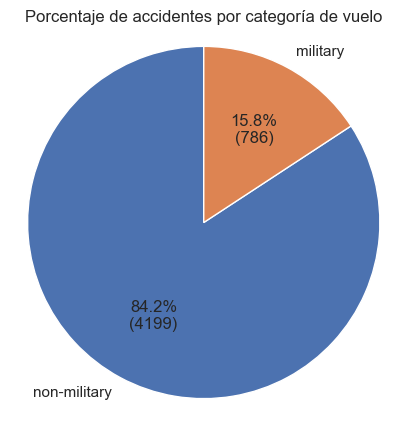

In [627]:
# Calculamos el recuento de accidentes por categoría
category_counts = df['category'].value_counts()

# Creamos el gráfico circular
plt.figure(figsize=(5, 5))
plt.pie(category_counts, labels=category_counts.index, autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100*category_counts.sum())})', startangle=90)
plt.title('Porcentaje de accidentes por categoría de vuelo')
plt.axis('equal')
plt.show()

In [628]:
category_counts

category
non-military    4200
military         786
Name: count, dtype: int64

Fatalidades

Cual fue el vuelo con mayor fatalidad y que sucedio?

In [629]:
# Obtenemos el índice del vuelo con mayor número de fatalidades
indice_max_fatalidades = df['total_fatalities'].idxmax()

# Obtenemos el número de vuelo, la descripción de lo sucedido y el número de fatalidades correspondientes
num_vuelo_max_fatalidades = df.loc[indice_max_fatalidades, 'flight_no']
descripcion_suceso_max_fatalidades = df.loc[indice_max_fatalidades, 'summary']
num_fatalidades_max_fatalidades = df.loc[indice_max_fatalidades, 'total_fatalities']
operador_max_fatalidades = df.loc[indice_max_fatalidades, 'airline_operator']

# Imprimimos los resultados
print("Número de vuelo con mayor número de fatalidades:", num_vuelo_max_fatalidades)
print("Operador involucrado:", operador_max_fatalidades)
print("Número de fatalidades:", num_fatalidades_max_fatalidades)
print("Descripción de lo sucedido:", descripcion_suceso_max_fatalidades)


Número de vuelo con mayor número de fatalidades: 1736/4805
Operador involucrado: Pan American World Airways / KLM
Número de fatalidades: 583
Descripción de lo sucedido: Both aircraft were diverted to Tenerife because of a bombing at Las Palmas Airport. After an extended delay,  both planes were instructed to back track up the runway. The KLM plane reached its takeoff point while the Pan Am plane was still on the runway. The Pan Am plane continued up the runway missing the taxiway turnout. There was heavy fog on the runway. The KLM plane began its takeoff roll without permission with the Pan Am plane still on the runway. The controller and Pan Am pilot each radioed a warning to the KLM plane, but were not heard because the simultaneous transmissions interfered with each other.The KLM plane hit the Pan Am plane just as it was taking off. Both planes burst into flames.  KLM 234 + 14 crew,  Pan Am 326 + 9 crew killed. All aboard the KLM plane were killed. The KLM captain was their safety o

In [630]:
#Ambos aviones fueron desviados a Tenerife a causa de un bombardeo en el aeropuerto de Las Palmas. Después de una demora prolongada, ambos aviones recibieron instrucciones de retroceder por la pista. El avión de KLM llegó a su punto de despegue mientras el avión de Pan Am aún se encontraba en la pista. El avión de Pan Am continuó por la pista y se perdió el desvío de la calle de rodaje. Había una densa niebla en la pista. El avión de KLM inició su carrera de despegue sin permiso con el avión de Pan Am aún en la pista. El controlador y el piloto de Pan Am enviaron por radio una advertencia al avión de KLM, pero no fueron escuchados porque las transmisiones simultáneas interferían entre sí. El avión de KLM chocó contra el avión de Pan Am justo cuando estaba despegando. Ambos aviones estallaron en llamas. KLM 234 + 14 tripulantes, Pan Am 326 + 9 tripulantes muertos. Todos los que iban a bordo del avión de KLM murieron. El capitán de KLM era su responsable de seguridad y durante algunos meses había estado entrenando a otros pilotos utilizando un simulador, donde no se simulaba la obtención del permiso de despegue. El avión de Pan Am recibió el nombre de Clipper Victor. El avión de KLM recibió el nombre de Río Rin. A pesar de todas las circunstancias, la NTSB culpó al avión de KLM por despegar sin permiso.

Cuales aerolinas tienen mas sobrevivientes en caso de accidente?

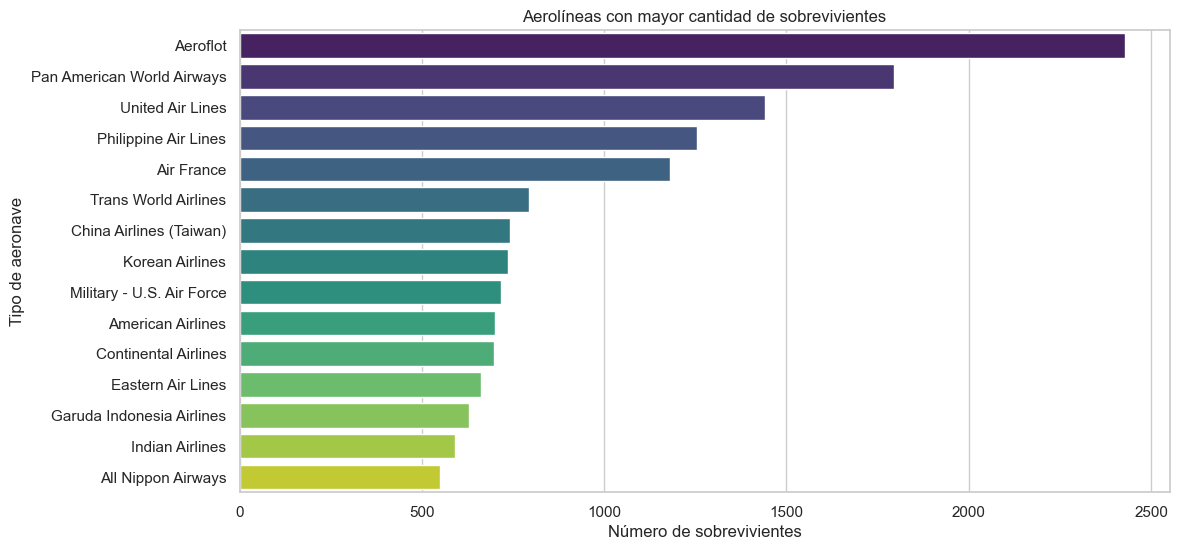

In [631]:
# Calculamos los sobrevivientes por aeronave
survivors_by_airline = df.groupby('airline_operator')['survivors'].sum().reset_index()

# Dejamos solamente las 15 más seguras
top_airline_survivors = survivors_by_airline.nlargest(15, 'survivors')

# Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(x='survivors', y='airline_operator', data=top_airline_survivors, palette='viridis')
plt.xlabel('Número de sobrevivientes')
plt.ylabel('Tipo de aeronave')
plt.title('Aerolíneas con mayor cantidad de sobrevivientes')
plt.show()

Marca de aeronaves con mas sobrevivientes

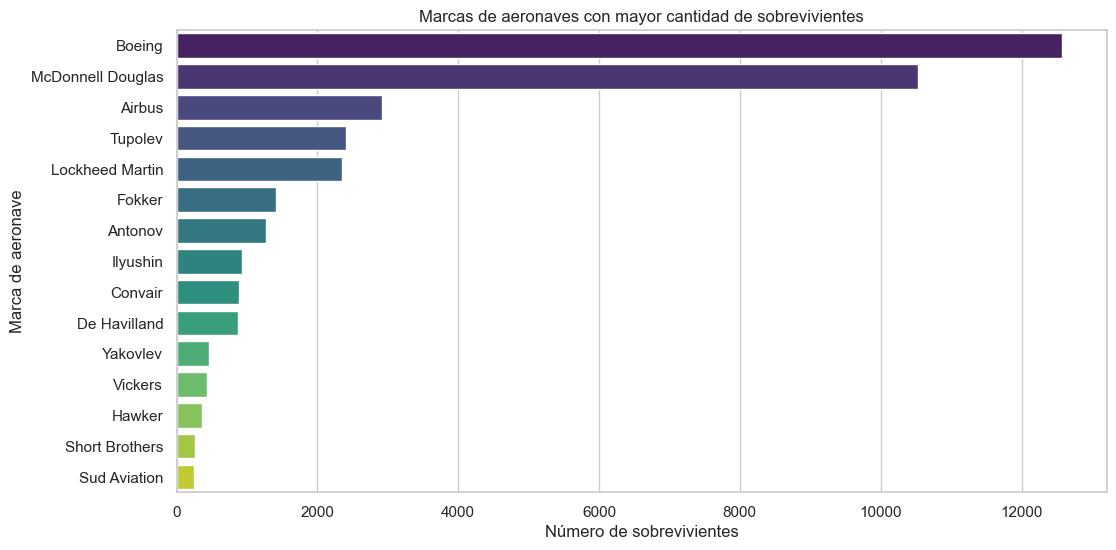

In [632]:
# Filtramos 'other' del recuento
data_filtered = df[df['brand'] != 'other']

# Calculamos los sobrevivientes por marca
survivors_by_brand = data_filtered.groupby('brand')['survivors'].sum().reset_index()

# Dejamos solamente las 15 más seguras
top_brands_survivors = survivors_by_brand.nlargest(15, 'survivors')

# Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(x='survivors', y='brand', data=top_brands_survivors, palette='viridis')
plt.xlabel('Número de sobrevivientes')
plt.ylabel('Marca de aeronave')
plt.title('Marcas de aeronaves con mayor cantidad de sobrevivientes')
plt.show()

Cuales no son las mas seguras?

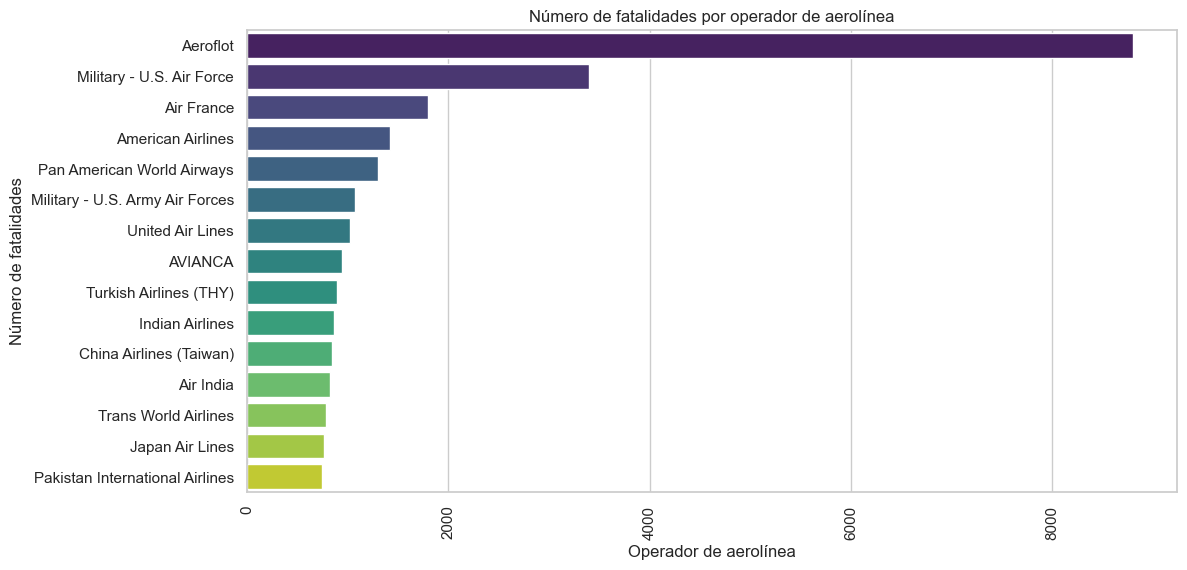

In [633]:
# Agrupamos por operador
fatalities_by_operator = df.groupby('airline_operator')['total_fatalities'].sum().reset_index()

# Ordenamos en forma descendente y tomamos los 15 con mayor cantidad
fatalities_by_operator = fatalities_by_operator.nlargest(15, 'total_fatalities')

#Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(y='airline_operator', x='total_fatalities', data=fatalities_by_operator, palette='viridis')
plt.xlabel('Operador de aerolínea')
plt.ylabel('Número de fatalidades')
plt.title('Número de fatalidades por operador de aerolínea')
plt.xticks(rotation=90)
plt.show()


Marcas que tienen la mayor cantidad de fatalidades

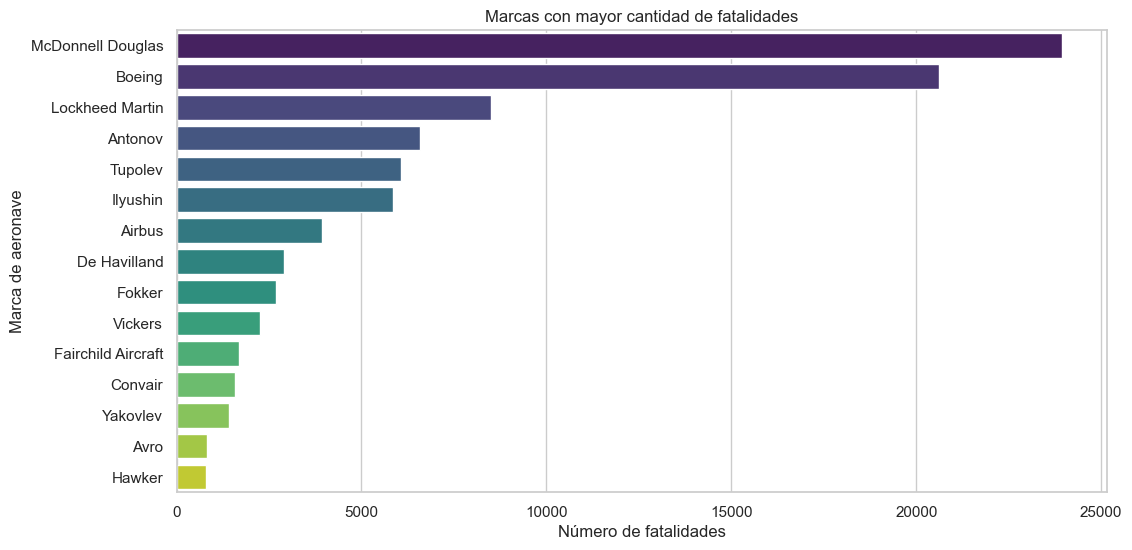

In [634]:
# Filtramos 'other' del recuento
data_filtered = df[df['brand'] != 'other']

# Agrupamos por tipo de marca
fatalities_by_brand = data_filtered.groupby('brand')['total_fatalities'].sum().reset_index()

# Ordenamos en forma descendente y tomamos los 15 con mayor cantidad
top_brand_fatalities = fatalities_by_brand.nlargest(15, 'total_fatalities')

# Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(x='total_fatalities', y='brand', data=top_brand_fatalities, palette='viridis')
plt.xlabel('Número de fatalidades')
plt.ylabel('Marca de aeronave')
plt.title('Marcas con mayor cantidad de fatalidades')
plt.show()


5) Analisis temporal

Los vuelos en los ultimos años son mas seguros?

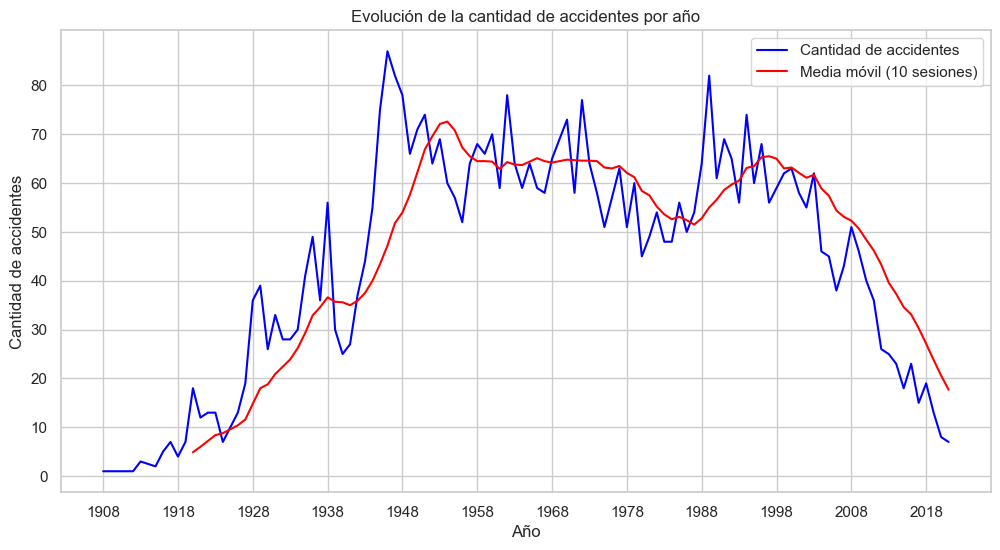

In [635]:
# Extraemos el año de la columna 'date'
df['year'] = pd.to_datetime(df['date']).dt.year

# Agrupamos por año y contamos la cantidad de accidentes
accidents_by_year = df.groupby('year').size().reset_index(name='Cantidad de accidentes')

# Calculamos la media móvil de 10 sesiones
accidents_by_year['Media móvil'] = accidents_by_year['Cantidad de accidentes'].rolling(window=10).mean()

# Creamos el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=accidents_by_year, x='year', y='Cantidad de accidentes', color='blue', label='Cantidad de accidentes')
sns.lineplot(data=accidents_by_year, x='year', y='Media móvil', color='red', label='Media móvil (10 sesiones)')

# Establecemos separación del eje x cada 10 años
plt.xticks(range(min(accidents_by_year['year']), max(accidents_by_year['year'])+1, 10))

# Establecemos separación del eje y cada 10 unidades
plt.yticks(range(0, max(accidents_by_year['Cantidad de accidentes'])+1, 10))

# Mostramos gridlines
plt.grid(True)

# Establecemos etiquetas de los ejes
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')

# Establecemos título del gráfico
plt.title('Evolución de la cantidad de accidentes por año')

# Mostramos el gráfico
plt.show()

Cual año tiene mas accidentes?

In [636]:
# Agrupamos por año y contamos la cantidad de accidentes
accidents_by_year = df.groupby('year').size().reset_index(name='accident_count')

# Ordenamos el DataFrame por la columna 'Cantidad de accidentes' de forma descendente
top_10_years = accidents_by_year.sort_values(by='accident_count', ascending=False).head(10)

# Mostramos el DataFrame con el top 10 de años ordenados por cantidad de accidentes
top_10_years

,year,accident_count
35,1946,87
36,1947,82
78,1989,82
37,1948,78
51,1962,78
61,1972,77
34,1945,75
40,1951,74
83,1994,74
59,1970,73


Cual es el mes con mas accidentes?

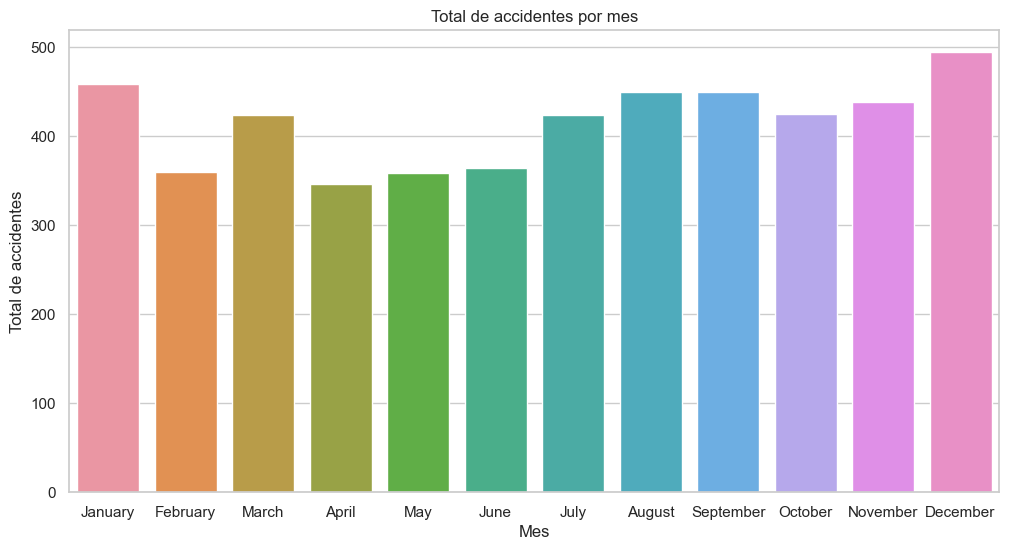

In [637]:
import calendar

# Extraemos el mes de la columna 'date'
df['month'] = pd.to_datetime(df['date']).dt.month

# Obtenemos los nombres de los meses
df['month'] = df['month'].apply(lambda x: calendar.month_name[x])

# Agrupamos por mes y contamos la cantidad de accidentes
accidents_by_month = df.groupby('month').size().reset_index(name='accident_count')

# Ordenamos los meses de forma cíclica
months_order = list(calendar.month_name)[1:]  # Lista de nombres de los meses sin el primer elemento (vacío)
accidents_by_month['month'] = pd.Categorical(accidents_by_month['month'], categories=months_order, ordered=True)
accidents_by_month = accidents_by_month.sort_values('month')

# Creamos el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_by_month, x='month', y='accident_count')

# Establecemos etiquetas de los ejes
plt.xlabel('Mes')
plt.ylabel('Total de accidentes')

# Establecemos título en el gráfico
plt.title('Total de accidentes por mes')

# Mostramos el gráfico
plt.show()

y el dia?

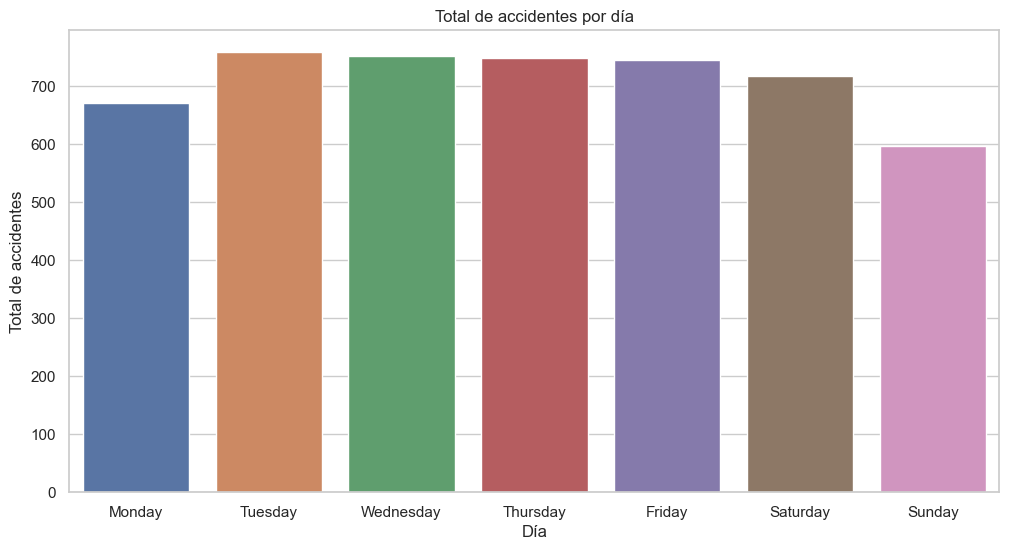

In [638]:
# Extraemos el día de la columna 'date'
df['day'] = pd.to_datetime(df['date']).dt.dayofweek

# Obtenemos los nombres de los días de la semana
df['day'] = df['day'].apply(lambda x: calendar.day_name[x])

# Agrupamos por día y contamos la cantidad de accidentes
accidents_by_day = df.groupby('day').size().reset_index(name='accident_count')

# Ordenamos los días de la semana de forma cíclica
days_order = list(calendar.day_name)
accidents_by_day['day'] = pd.Categorical(accidents_by_day['day'], categories=days_order, ordered=True)
accidents_by_day = accidents_by_day.sort_values('day')

# Creamos el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_by_day, x='day', y='accident_count')

# Establecemos etiquetas de los ejes
plt.xlabel('Día')
plt.ylabel('Total de accidentes')

# Establecemos título del gráfico
plt.title('Total de accidentes por día')

# Mostramos el gráfico
plt.show()


KPIS

In [639]:
#  Elejimos las columnas que quiero pasar a int64
columnas_numericas = ['total_aboard','passengers_aboard','crew_aboard','total_fatalities','passengers_fatalities','crew_fatalities']

for columna in columnas_numericas:
    df[columna] = pd.to_numeric(df[columna], errors='coerce')

# Luego, convierte las columnas a int64, llenando los valores NaN si es necesario
for columna in columnas_numericas:
    df[columna] = df[columna].fillna(0).astype('int64')


A) Evaluar la disminución de un 10% la tasa de fatalidad de la tripulación en los últimos 10 años, comparado a la década anterior.

No se ha cumplido el objetivo de reducción del 10% en la tasa de fatalidad de la tripulación.


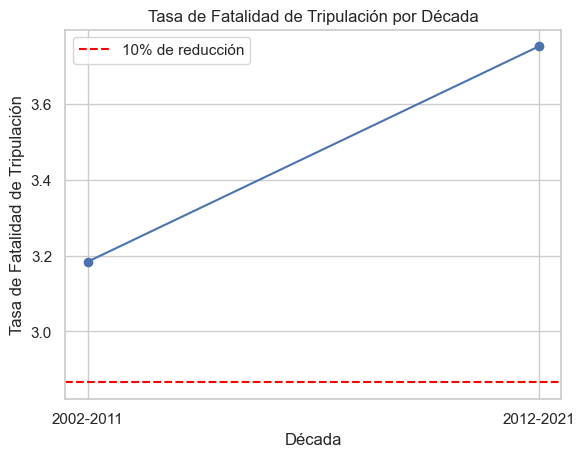

In [641]:
# Filtrar datos para la última década (2012-2021) y la década anterior (2002-2011)
Ultima_decada = df[(df['year'] >= 2012) & (df['year'] <= 2021)]
Decada_pasada = df[(df['year'] >= 2002) & (df['year'] <= 2011)]

# Calcular la tasa de fatalidad de la tripulación para ambas décadas
fatalities_Ultima_decada = Ultima_decada['crew_fatalities'].sum()
accidents_Ultima_decada = len(Ultima_decada)
crew_fatality_rate_Ultima_decada = fatalities_Ultima_decada / accidents_Ultima_decada

fatalities_Decada_pasada = Decada_pasada['crew_fatalities'].sum()
accidents_Decada_pasada = len(Decada_pasada)
crew_fatality_rate_Decada_pasada = fatalities_Decada_pasada / accidents_Decada_pasada

# Calcular la disminución porcentual
percentage_reduction = ((crew_fatality_rate_Decada_pasada - crew_fatality_rate_Ultima_decada) / crew_fatality_rate_Decada_pasada) * 100

# Comprobar si se cumplió el objetivo del 10% de reducción
if percentage_reduction >= 10:
    print("Se ha cumplido el objetivo de reducción del 10% en la tasa de fatalidad de la tripulación.")
else:
    print("No se ha cumplido el objetivo de reducción del 10% en la tasa de fatalidad de la tripulación.")

# Crear una lista de años para el eje x
years = ['2002-2011', '2012-2021']

# Crear una lista de tasas de fatalidad de tripulación para el eje y
fatality_rates = [crew_fatality_rate_Decada_pasada, crew_fatality_rate_Ultima_decada]

# Crear el gráfico de líneas
plt.plot(years, fatality_rates, marker='o', linestyle='-')

# Agregar título y etiquetas de ejes
plt.title('Tasa de Fatalidad de Tripulación por Década')
plt.xlabel('Década')
plt.ylabel('Tasa de Fatalidad de Tripulación')

# Agregar una línea horizontal en el 10% de reducción
plt.axhline(y=crew_fatality_rate_Decada_pasada * 0.9, color='red', linestyle='--', label='10% de reducción')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [ ]:
# Se puede observar que aumento un casi un 3% en la ultima decada

In [650]:
# Filtrar datos para el período completo (1908-2021)
full_period = df[(df['year'] >= 1908) & (df['year'] <= 2021)]

# Calcular la tasa de fatalidad de la tripulación para todo el período
fatalities_full_period = full_period['crew_fatalities'].sum()
accidents_full_period = len(full_period)
crew_fatality_rate_full_period = fatalities_full_period / accidents_full_period

# Calcular la tasa de fatalidad de la tripulación para la última década (2012-2021)
last_decade = df[(df['year'] >= 2012) & (df['year'] <= 2021)]
fatalities_last_decade = last_decade['crew_fatalities'].sum()
accidents_last_decade = len(last_decade)
crew_fatality_rate_last_decade = fatalities_last_decade / accidents_last_decade

# Calcular la disminución porcentual
percentage_reduction = ((crew_fatality_rate_full_period - crew_fatality_rate_last_decade) / crew_fatality_rate_full_period) * 100

# Comprobar si se cumplió el objetivo del 10% de reducción
if percentage_reduction >= 10:
    print("El objetivo de reducir un 10% si secumple usando todos los años (1908-2021)(1908-2021).")
else:
    print("El objetivo de reducir un 10% no se cumple usando todos los años (1908-2021).")


El objetivo de reducir un 10% no se cumple usando todos los años (1908-2021).


In [642]:
# Realize un analisis mas extenso usando todos los años y el objetivo de reducir un 10% no se llega a cumplir

B) Tasa anual de mortalidad. Objetivo: reducir en un 5% la tasa, año a año

In [643]:
# Calculamos la mortalidad para cada vuelo
df['mortality_rate'] = df['total_fatalities'] / df['total_aboard']

# Agrupamos por año
mortality_by_year = df.groupby('year').agg({'total_fatalities': 'sum', 'total_aboard': 'sum'})

# Calculamos la tasa de mortalidad por año
mortality_by_year['mortality_rate'] = mortality_by_year['total_fatalities'] / mortality_by_year['total_aboard']

# Observamos los valores
mortality_by_year

,total_fatalities,total_aboard,mortality_rate
year,,,
1908,1,2,0.500000
1909,1,1,1.000000
1912,5,5,1.000000
1913,43,49,0.877551
1915,36,60,0.600000
...,...,...,...
2017,214,245,0.873469
2018,874,1239,0.705408
2019,305,432,0.706019


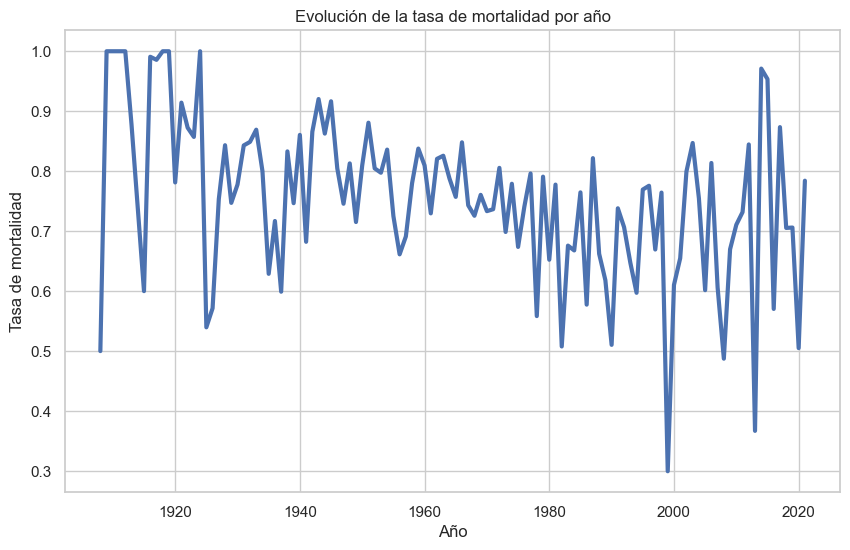

In [644]:
# Graficamos

# Ajustamos el tamaño de la figura
plt.figure(figsize=(10, 6))

# Configuramos el estilo de Seaborn
sns.set(style="whitegrid")

# Creamos el gráfico de líneas 
sns.lineplot(data=mortality_by_year, x=mortality_by_year.index, y='mortality_rate', linewidth=3, markers=False)

plt.xlabel('Año')
plt.ylabel('Tasa de mortalidad')
plt.title('Evolución de la tasa de mortalidad por año')

# Mostrar el gráfico
plt.show()

Ahora procedemos a calcular y comparar el cambio en  tasas de mortalidad

In [645]:
# Calculamos la mortalidad para cada vuelo
df['mortality_rate'] = df['total_fatalities'] / df['total_aboard']

# Agrupamos por año
mortality_by_year = df.groupby('year').agg({'total_fatalities': 'sum', 'total_aboard': 'sum'})

# Calculamos la tasa de mortalidad por año
mortality_by_year['mortality_rate'] = mortality_by_year['total_fatalities'] / mortality_by_year['total_aboard']

# Filtramos a partir de 2010
mortality_by_year_filtrado = mortality_by_year[mortality_by_year.index >= 2010]

# Calculamos la variación interanual en la tasa de mortalidad
mortality_by_year_filtrado['mortality_rate_change'] = mortality_by_year_filtrado['mortality_rate'].pct_change()

# Observamos los valores
mortality_by_year_filtrado

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11180\3609007640.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_by_year_filtrado['mortality_rate_change'] = mortality_by_year_filtrado['mortality_rate'].pct_change()


,total_fatalities,total_aboard,mortality_rate,mortality_rate_change
year,,,,
2010,1044,1469,0.710688,NaN
2011,720,984,0.731707,0.029577
2012,587,695,0.844604,0.154293
2013,287,782,0.367008,-0.565468
2014,1142,1176,0.971088,1.645962
2015,759,796,0.953518,-0.018094
2016,515,903,0.570321,-0.401877
2017,214,245,0.873469,0.531540
2018,874,1239,0.705408,-0.192407


In [646]:
# Podemos mirar una tendencia bajista desde 2014 pero actualmente la tasa se encuentra en aumento
# En los años que disminuen se tiene un porcentaje de cambio superior a un 20%

C) Media móvil de accidentes cada 10 años. Objetivo: mantenerse por debajo de la misma los próximos años

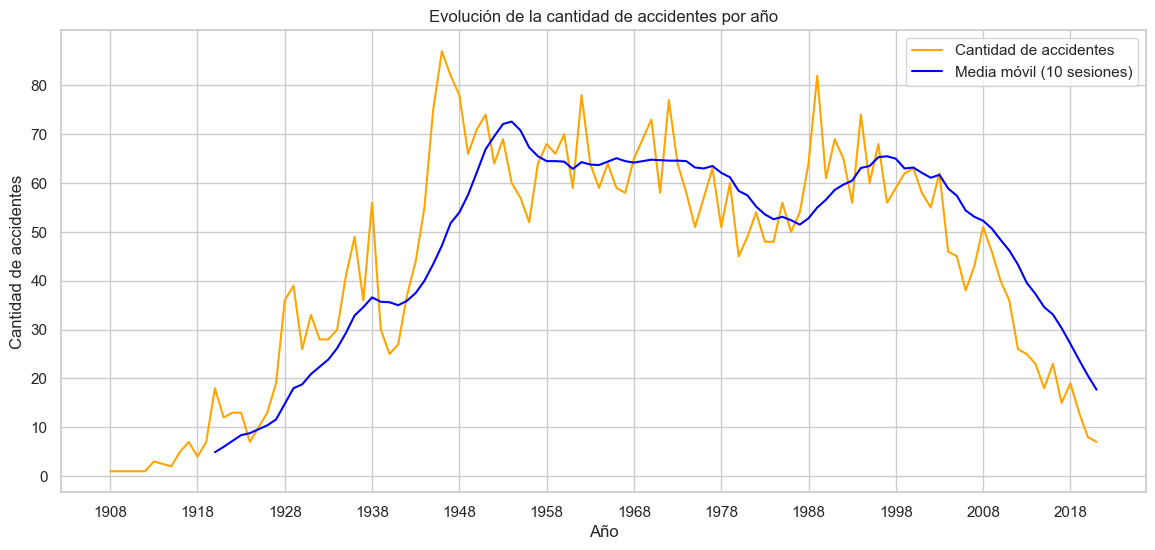

In [654]:
# Agrupamos por año y contamos la cantidad de accidentes
accidents_by_year = df.groupby('year').size().reset_index(name='Cantidad de accidentes')

# Calculamos la media móvil de 10 sesiones
accidents_by_year['Media móvil'] = accidents_by_year['Cantidad de accidentes'].rolling(window=10).mean()

# Creamos el gráfico de líneas
plt.figure(figsize=(14, 6))
sns.lineplot(data=accidents_by_year, x='year', y='Cantidad de accidentes', color='orange', label='Cantidad de accidentes')
sns.lineplot(data=accidents_by_year, x='year', y='Media móvil', color='blue', label='Media móvil (10 sesiones)')

# Establecemos separación del eje x cada 10 años
plt.xticks(range(min(accidents_by_year['year']), max(accidents_by_year['year'])+1, 10))

# Establecemos separación del eje y cada 10 unidades
plt.yticks(range(0, max(accidents_by_year['Cantidad de accidentes'])+1, 10))

# Mostramos gridlines
plt.grid(True)

# Establecemos etiquetas de los ejes
plt.xlabel('Año')
plt.ylabel('Cantidad de accidentes')

# Establecemos título del gráfico
plt.title('Evolución de la cantidad de accidentes por año')

# Mostramos el gráfico
plt.show()

In [656]:
accidents_by_year

,year,Cantidad de accidentes,Media móvil
0,1908,1,NaN
1,1909,1,NaN
2,1912,1,NaN
3,1913,3,NaN
4,1915,2,NaN
...,...,...,...
106,2017,15,30.3
107,2018,19,27.1
108,2019,13,23.8
109,2020,8,20.6


7) Guardado y exportacion a SQL

In [659]:
df.to_csv('AccidentesLimpio.csv', index=False, sep = ';')